# this notebook repeat the analysis in notebooks A1-4 with a new mutant datasets (11283_1)
- get GESA plot for stem cell
- compare cell type proportion
- ABS cell violin and strip plot for certain markers

In [1]:
import scanpy as sc 
import numpy as np
import pandas as pd
import os
import sys
from matplotlib import pyplot as plt
import anndata as ad


In [2]:
import seaborn as sn

In [3]:
sys.path.append("/home/lucy/star_proto_filter/")
sys.path.append("/home/lucy/")
sys.path.append("/home/lucy/AmbientContaminationMetrics/")
#sys.path.append("/home/lucy/quality/plot_quality_score.py")


In [4]:
import zc_filter_function as zc_filter
import quality_control_function as zc_qc
import plot_quality_score as qc_plt
import zc_function as zc

In [5]:
filtered_data_dir = '/home/lucy/Dropbox (VU Basic Sciences)/random_data_check/filtered_data/'

## A1 GSEA analysis 
- code copied from A1 and A1b
- first subset the WT so that WT and mutant has the same number of stem cells

### load datasets

In [6]:
filenames = [f'10868_{i+1}.h5ad' for i in range(5) ]

In [7]:
dat_ls = []

In [8]:
for f in filenames:
    d = sc.read("./new_sample_10868_filtered/" + f )
    print(f)
    print( d.X.sum(axis = 1)[0:5] )
    d.raw = d.copy()
    dat_ls.append(d)

10868_1.h5ad
[80471. 75901. 70469. 67803. 65841.]
10868_2.h5ad
[55894. 53991. 53560. 49773. 47660.]
10868_3.h5ad
[40038. 38935. 33323. 30162. 29648.]
10868_4.h5ad
[40038. 38935. 33323. 31530. 30162.]
10868_5.h5ad
[65981. 59557. 53141. 50763. 49964.]


In [9]:
dat6 = sc.read('./new_sample_10868_filtered/11283_1_filtered.h5ad')

In [10]:
dat_ls[0]

AnnData object with n_obs × n_vars = 3273 × 23312
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment', 'cell_type_old', 'old_cell_type2', 'cytotrace'
    var: 'Mitochondrial', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    uns: 'cell_type_clusters', 'cell_type_colors', 'leiden', 'leiden_colors', 'neighbors', 'paneth', 'pca', 'rank_genes_groups', 'sample_colors', 'treatment_colors', 'umap', 'unknown_clusters'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [11]:
dat6

AnnData object with n_obs × n_vars = 2025 × 23964
    obs: 'total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'n_counts', 'leiden', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'dk_label2', 'isEE', 'isTUF', 'cell_type'
    var: 'Mitochondrial', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mito', 'ambient', 'dropkick_coef', 'mean', 'std', 'n_counts'
    uns: 'Order', 'cell_type_colors', 'dk_label2_colors', 'dropkick_args', 'dropkick_label_colors', 'dropkick_thresholds', 'inflection1', 'inflection_fold', 'isEE_colors', 'isTUF_colors', 'leiden', 'leiden_colors', 'neighbors

In [12]:
dat6.obs['sample'] = ['11283_1' for i in dat6.obs.index]
dat6.obs['treatment'] = ['Mut' for i in dat6.obs.index]

### combine datasets

In [13]:
combined2 = ad.concat(dat_ls[0:3]+ [dat6], merge = 'same')

In [14]:
combined2

AnnData object with n_obs × n_vars = 14618 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment'
    var: 'Mitochondrial'
    obsm: 'X_pca', 'X_umap'
    layers: 'arcsinh', 'raw_counts'

In [15]:
combined2.X.sum(axis = 1)

matrix([[80421.],
        [75866.],
        [70448.],
        ...,
        [ 2622.],
        [ 2611.],
        [ 2605.]], dtype=float32)

In [16]:
condition_dict = {'WT': 'WT', 'Mut':'Mtgr1 -/-'}

In [18]:
combined2.obs['condition'] = [condition_dict[t] for t in combined2.obs['treatment']]

In [19]:
combined2.raw = combined2.copy()

In [20]:
zc.normalization( combined2)
zc.clustering( combined2 )

/home/lucy/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


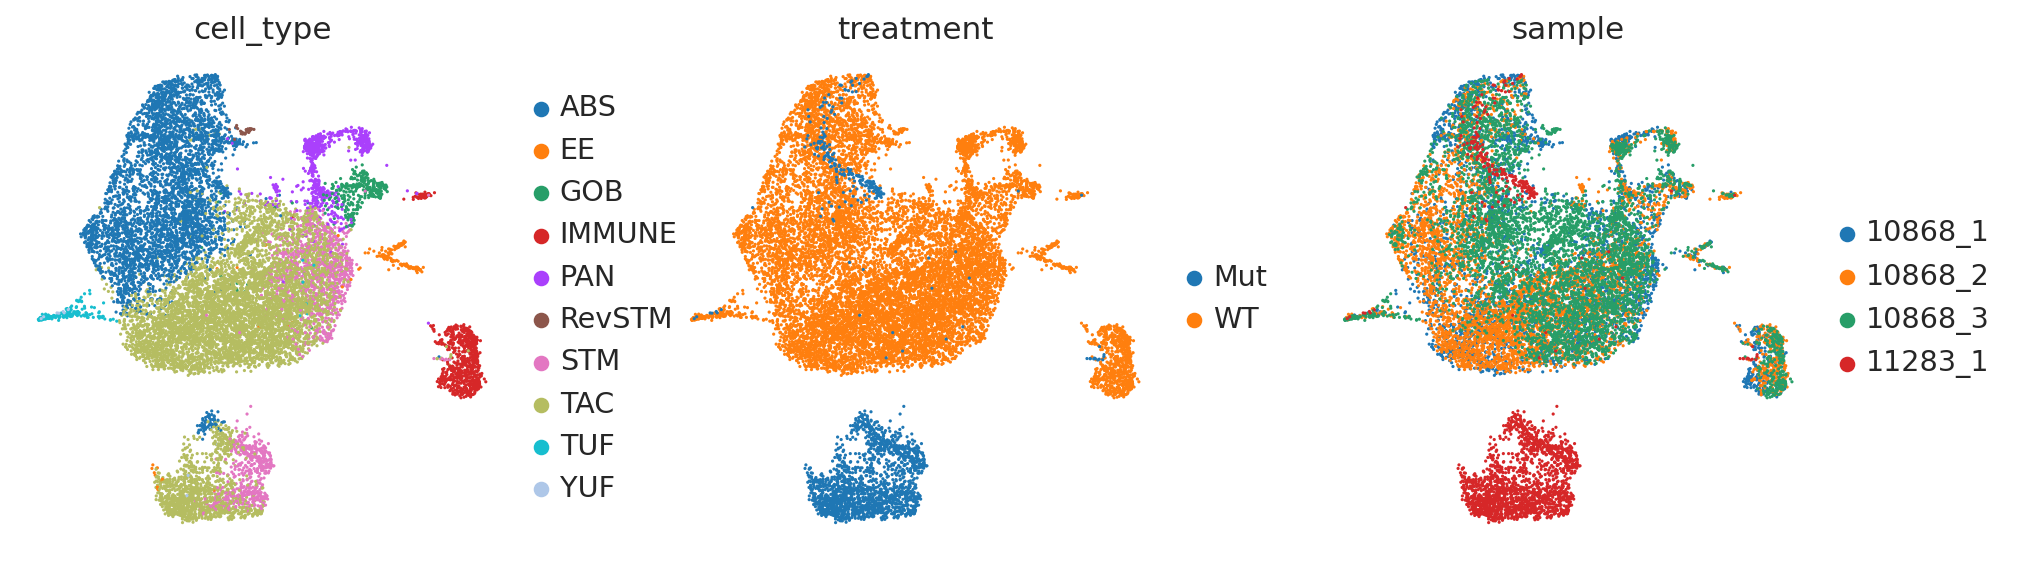

In [23]:
sc.pl.umap( combined2, color = ['cell_type', 'treatment', 'sample'] )

In [24]:
combined2.X = combined2.raw.X

### subsample dataset

In [26]:
comb = sc.read("./new_sample_10868_filtered/combined_dat1246.h5ad")

In [35]:
wt = comb[comb.obs['treatment'] == 'WT' ]
mut = comb[comb.obs['treatment'] == 'Mut' ]

In [28]:
wt

View of AnnData object with n_obs × n_vars = 12593 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment', 'condition'
    var: 'Mitochondrial', 'mean', 'std'
    uns: 'cell_type_colors', 'neighbors', 'pca', 'sample_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [30]:
mut

View of AnnData object with n_obs × n_vars = 2025 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment', 'condition'
    var: 'Mitochondrial', 'mean', 'std'
    uns: 'cell_type_colors', 'neighbors', 'pca', 'sample_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [37]:
sc.pp.subsample( wt, n_obs= 3000) 

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


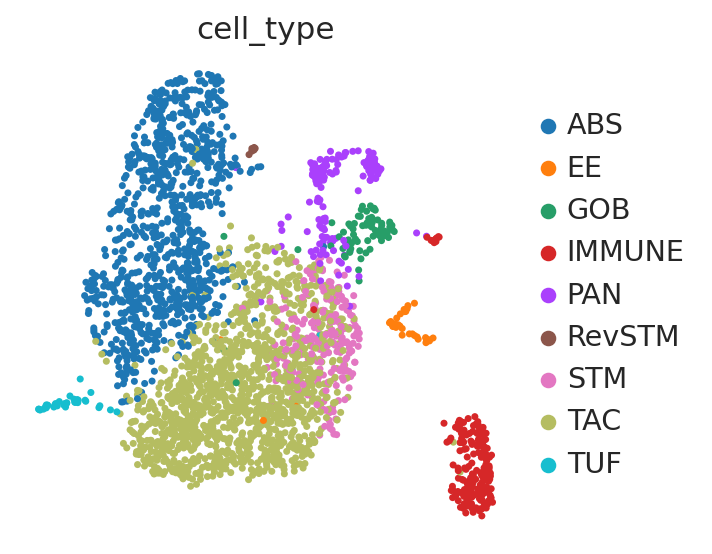

In [38]:
sc.pl.umap( wt, color = 'cell_type')

In [39]:
comb_sub = ad.concat([wt, mut])

In [40]:
comb_sub

AnnData object with n_obs × n_vars = 5025 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment', 'condition'
    obsm: 'X_pca', 'X_umap'
    layers: 'arcsinh', 'raw_counts'

### DGE stem

In [41]:
stem = comb_sub[comb_sub.obs['cell_type'] == 'STM' ] 

In [42]:
stem

View of AnnData object with n_obs × n_vars = 748 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment', 'condition'
    obsm: 'X_pca', 'X_umap'
    layers: 'arcsinh', 'raw_counts'

In [43]:
sc.tl.rank_genes_groups( stem, groupby='condition',  reference= 'WT', use_raw= False, layer='arcsinh', method = 'wilcoxon', key_added='stem_DGE' , )

/home/lucy/.local/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


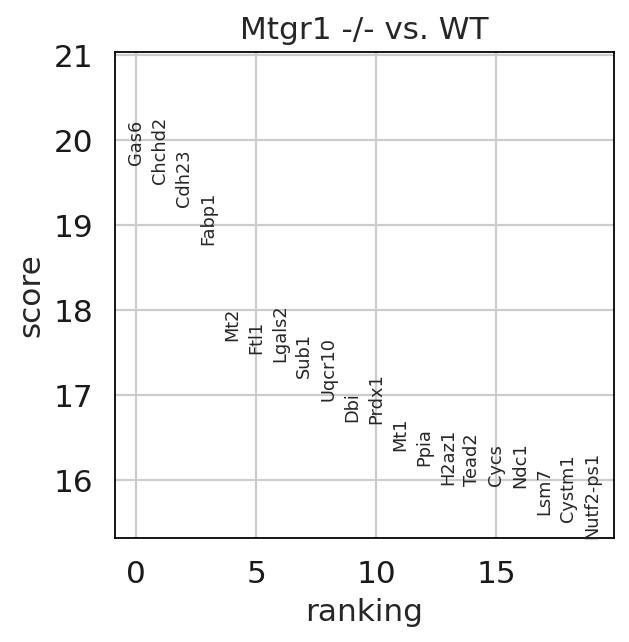

In [44]:
sc.pl.rank_genes_groups( stem, key='stem_DGE' )

In [45]:
sc.tl.rank_genes_groups( stem, groupby='condition',  reference= 'Mtgr1 -/-', use_raw= False, layer='arcsinh', method = 'wilcoxon', key_added='stem_DGE_inverse' , )

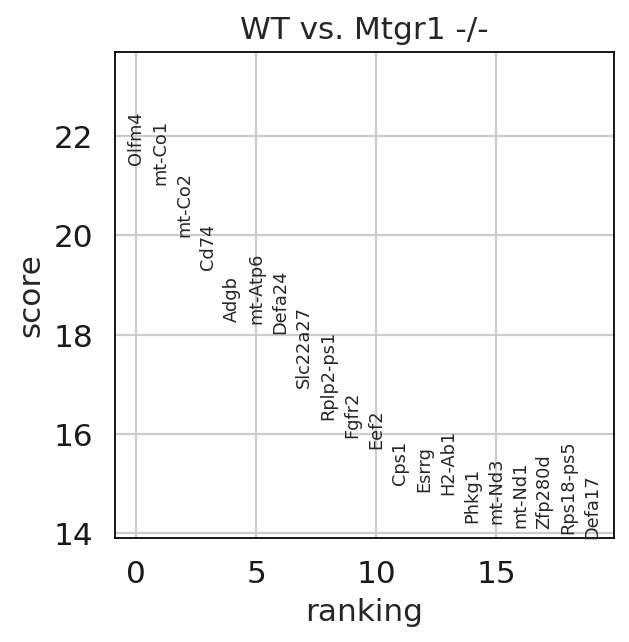

In [46]:
sc.pl.rank_genes_groups( stem, key='stem_DGE_inverse' )

In [47]:
stem.obs['condition'].value_counts()

condition
Mtgr1 -/-    514
WT           234
Name: count, dtype: int64

In [48]:
stem.obs['sample'].value_counts()

sample
11283_1    514
10868_1    100
10868_2     77
10868_3     57
Name: count, dtype: int64

In [49]:
stem

AnnData object with n_obs × n_vars = 748 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment', 'condition'
    uns: 'stem_DGE', 'stem_DGE_inverse'
    obsm: 'X_pca', 'X_umap'
    layers: 'arcsinh', 'raw_counts'

In [50]:
mut_rnk_dict = stem.uns['stem_DGE']
wt_rnk_dict = stem.uns['stem_DGE_inverse']

In [51]:
mut_rnk_dict

{'params': {'groupby': 'condition',
  'reference': 'WT',
  'method': 'wilcoxon',
  'use_raw': False,
  'layer': 'arcsinh',
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('Gas6',), ('Chchd2',), ('Cdh23',), ..., ('mt-Co2',),
            ('mt-Co1',), ('Olfm4',)],
           dtype=[('Mtgr1 -/-', 'O')]),
 'scores': rec.array([( 19.720745,), ( 19.493916,), ( 19.22493 ,), ...,
            (-19.978233,), (-21.032274,), (-21.437393,)],
           dtype=[('Mtgr1 -/-', '<f4')]),
 'pvals': rec.array([(1.43104004e-086,), (1.23649433e-084,), (2.28947247e-082,),
            ..., (8.51850876e-089,), (3.32330722e-098,),
            (5.98741273e-102,)],
           dtype=[('Mtgr1 -/-', '<f8')]),
 'pvals_adj': rec.array([(7.82063380e-83,), (5.40595323e-81,), (7.14969547e-79,), ...,
            (6.20715338e-85,), (3.63237480e-94,), (1.30884842e-97,)],
           dtype=[('Mtgr1 -/-', '<f8')]),
 'logfoldchanges': rec.array([( 4.6768093,), ( 2.5410442,), ( 6.2917705,), ...,
            (-1.5973

In [52]:
mut_dge_res = zc.parse_rank_gene_group_dict(mut_rnk_dict, fields_to_keep = ['logfoldchanges', 'pvals_adj', 'pvals', 'names', 'scores'], 
                               condition = 'Mtgr1 -/-', sort_by = 'scores', ascending = True)

In [53]:
wt_dge_res = zc.parse_rank_gene_group_dict(wt_rnk_dict, fields_to_keep = ['logfoldchanges', 'pvals_adj', 'pvals', 'names', 'scores'], 
                               condition = 'WT', sort_by = 'scores', ascending = True)

In [54]:
wt_dge_res.head()

logfoldchanges     pvals_adj         pvals   names     scores
21859       -4.676809  7.820634e-83  1.431040e-86    Gas6 -19.720745
21858       -2.541044  5.405953e-81  1.236494e-84  Chchd2 -19.493916
21857       -6.291770  7.149695e-79  2.289472e-82   Cdh23 -19.224930
21856       -3.563669  3.047932e-75  1.115437e-78   Fabp1 -18.779299
21855       -4.160589  2.147832e-66  1.179048e-69     Mt2 -17.641680

In [55]:
mut_dge_res.head()

logfoldchanges     pvals_adj          pvals   names     scores
21859       -8.305034  1.308848e-97  5.987413e-102   Olfm4 -21.437393
21858       -2.761827  3.632375e-94   3.323307e-98  mt-Co1 -21.032274
21857       -1.597369  6.207153e-85   8.518509e-89  mt-Co2 -19.978233
21856       -4.351810  1.224659e-79   3.361369e-83    Cd74 -19.324203
21855       -1.653295  3.532508e-71   1.454372e-74    Adgb -18.269249

In [56]:
wt_dge_res.tail()

logfoldchanges     pvals_adj          pvals   names     scores
4        1.653295  3.532508e-71   1.454372e-74    Adgb  18.269249
3        4.351810  1.224659e-79   3.361369e-83    Cd74  19.324203
2        1.597369  6.207153e-85   8.518509e-89  mt-Co2  19.978233
1        2.761827  3.632375e-94   3.323307e-98  mt-Co1  21.032274
0        8.305034  1.308848e-97  5.987413e-102   Olfm4  21.437393

### GSEA stem

In [57]:
import gseapy as gp

### get gene list:
- filter out gene with > 0.05 adj pvals
- sorted based on logfold changes

In [58]:
mut_dge_res.shape

(21860, 5)

In [59]:
significant_genes = mut_dge_res[mut_dge_res['pvals_adj'] < 0.05 ] 

In [60]:
significant_genes.shape

(5099, 5)

In [61]:
mut_up = significant_genes[significant_genes['logfoldchanges'] > 0 ]

In [62]:
mut_up.sort_values( by= 'pvals_adj', ascending= True, inplace= True)
mut_up.head()

/tmp/ipykernel_1657114/2443826550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mut_up.sort_values( by= 'pvals_adj', ascending= True, inplace= True)


logfoldchanges     pvals_adj         pvals   names     scores
0        4.676809  7.820634e-83  1.431040e-86    Gas6  19.720745
1        2.541044  5.405953e-81  1.236494e-84  Chchd2  19.493916
2        6.291770  7.149695e-79  2.289472e-82   Cdh23  19.224930
3        3.563669  3.047932e-75  1.115437e-78   Fabp1  18.779299
4        4.160589  2.147832e-66  1.179048e-69     Mt2  17.641680

In [63]:
wt_up = significant_genes[significant_genes['logfoldchanges'] < 0 ]

In [64]:
wt_up.sort_values( by= 'pvals_adj', ascending= True, inplace= True)
wt_up.head()

/tmp/ipykernel_1657114/222807914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wt_up.sort_values( by= 'pvals_adj', ascending= True, inplace= True)


logfoldchanges     pvals_adj          pvals   names     scores
21859       -8.305034  1.308848e-97  5.987413e-102   Olfm4 -21.437393
21858       -2.761827  3.632375e-94   3.323307e-98  mt-Co1 -21.032274
21857       -1.597369  6.207153e-85   8.518509e-89  mt-Co2 -19.978233
21856       -4.351810  1.224659e-79   3.361369e-83    Cd74 -19.324203
21855       -1.653295  3.532508e-71   1.454372e-74    Adgb -18.269249

In [65]:
wt_up.shape

(420, 5)

In [66]:
mut_up.shape

(4679, 5)

In [67]:
wt_up.head(20)

logfoldchanges     pvals_adj          pvals      names     scores
21859       -8.305034  1.308848e-97  5.987413e-102      Olfm4 -21.437393
21858       -2.761827  3.632375e-94   3.323307e-98     mt-Co1 -21.032274
21857       -1.597369  6.207153e-85   8.518509e-89     mt-Co2 -19.978233
21856       -4.351810  1.224659e-79   3.361369e-83       Cd74 -19.324203
21855       -1.653295  3.532508e-71   1.454372e-74       Adgb -18.269249
21854       -1.025504  6.563174e-71   3.002367e-74    mt-Atp6 -18.229650
21853       -4.067679  2.280922e-69   1.147765e-72     Defa24 -18.029280
21852       -1.912408  2.860570e-61   2.224597e-64   Slc22a27 -16.941479
21851       -5.468874  1.042108e-56   1.001110e-59  Rplp2-ps1 -16.299128
21850       -2.965431  3.320370e-54   3.949205e-57      Fgfr2 -15.929593
21849       -1.398208  9.031253e-53   1.156794e-55       Eef2 -15.716996
21848       -1.927780  4.952863e-48   8.609734e-51       Cps1 -14.989424
21847       -3.076900  3.917252e-47   7.167891e-50      Esrrg -14.847997
21846       -4.475506  8.566846e-47   1.645963e-49     H2-Ab1 -14.792156
21845       -7.838625  3.076217e-43   7.458349e-46      Phkg1 -14.214404
21844       -1.128254  4.010066e-43   1.008937e-45     mt-Nd3 -14.193235
21843       -0.734922  1.061484e-42   2.864937e-45     mt-Nd1 -14.119876
21842       -1.705776  1.483974e-42   4.073121e-45    Zfp280d -14.095058
21841       -1.832106  5.692835e-42   1.666704e-44  Rps18-ps5 -13.995238
21840       -3.988261  1.955375e-41   6.082593e-44     Defa17 -13.902900

In [68]:
wt_up = wt_up[ ~wt_up['names'].str.startswith('mt-') ]

In [69]:
wt_up.shape

(409, 5)

In [70]:
wt_up.head(20)

logfoldchanges     pvals_adj          pvals      names     scores
21859       -8.305034  1.308848e-97  5.987413e-102      Olfm4 -21.437393
21856       -4.351810  1.224659e-79   3.361369e-83       Cd74 -19.324203
21855       -1.653295  3.532508e-71   1.454372e-74       Adgb -18.269249
21853       -4.067679  2.280922e-69   1.147765e-72     Defa24 -18.029280
21852       -1.912408  2.860570e-61   2.224597e-64   Slc22a27 -16.941479
21851       -5.468874  1.042108e-56   1.001110e-59  Rplp2-ps1 -16.299128
21850       -2.965431  3.320370e-54   3.949205e-57      Fgfr2 -15.929593
21849       -1.398208  9.031253e-53   1.156794e-55       Eef2 -15.716996
21848       -1.927780  4.952863e-48   8.609734e-51       Cps1 -14.989424
21847       -3.076900  3.917252e-47   7.167891e-50      Esrrg -14.847997
21846       -4.475506  8.566846e-47   1.645963e-49     H2-Ab1 -14.792156
21845       -7.838625  3.076217e-43   7.458349e-46      Phkg1 -14.214404
21842       -1.705776  1.483974e-42   4.073121e-45    Zfp280d -14.095058
21841       -1.832106  5.692835e-42   1.666704e-44  Rps18-ps5 -13.995238
21840       -3.988261  1.955375e-41   6.082593e-44     Defa17 -13.902900
21839       -4.006989  1.656320e-40   5.606940e-43     Defa30 -13.743042
21838       -4.246842  1.021075e-36   4.437426e-39       Lyz1 -13.077332
21837       -0.614241  2.035685e-34   1.098860e-36      Rps20 -12.651409
21836       -1.756739  4.404610e-34   2.478349e-36      Kcnq1 -12.587357
21835       -0.720701  1.528862e-32   9.721491e-35       Tpt1 -12.294284

### Enrichment 

In [71]:
gs = [ 'GO_Biological_Process_2023', 'WikiPathways_2019_Mouse', 'KEGG_2019_Mouse']

In [72]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr_mut_up = gp.enrichr(gene_list=mut_up['names'].iloc[0:min(500, mut_up.shape[0])], # or "./tests/data/gene_list.txt",
                 gene_sets=gs,
                 organism='mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [74]:
enr_wt_up = gp.enrichr(gene_list=wt_up['names'].iloc[0:min(500, wt_up.shape[0])], # or "./tests/data/gene_list.txt",
                 gene_sets=gs,
                 organism='mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

### visualization

In [75]:
sn.color_palette("Set2", len(gs)).as_hex()

['#66c2a5', '#fc8d62', '#8da0cb']

In [76]:
clr = sn.color_palette("Set2", len(gs)).as_hex()

In [77]:
color_dict = dict( zip(gs,clr  ))

In [78]:
color_dict

{'GO_Biological_Process_2023': '#66c2a5',
 'WikiPathways_2019_Mouse': '#fc8d62',
 'KEGG_2019_Mouse': '#8da0cb'}

In [79]:
t5_mut_enr_ls = []

In [80]:
for i in range(len( gs)):
    
    er = gp.enrichr(gene_list=mut_up['names'], # or "./tests/data/gene_list.txt",
                     gene_sets=[gs[i]],
                     organism='mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                     outdir=None, # don't write to disk
                    )
    t5_mut_enr_ls.append( er)

In [81]:
t5_wt_enr_ls = []

In [82]:
for i in range(len( gs)):
    
    er = gp.enrichr(gene_list=wt_up['names'], # or "./tests/data/gene_list.txt",
                     gene_sets=[gs[i]],
                     organism='mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                     outdir=None, # don't write to disk
                    )
    t5_wt_enr_ls.append( er)

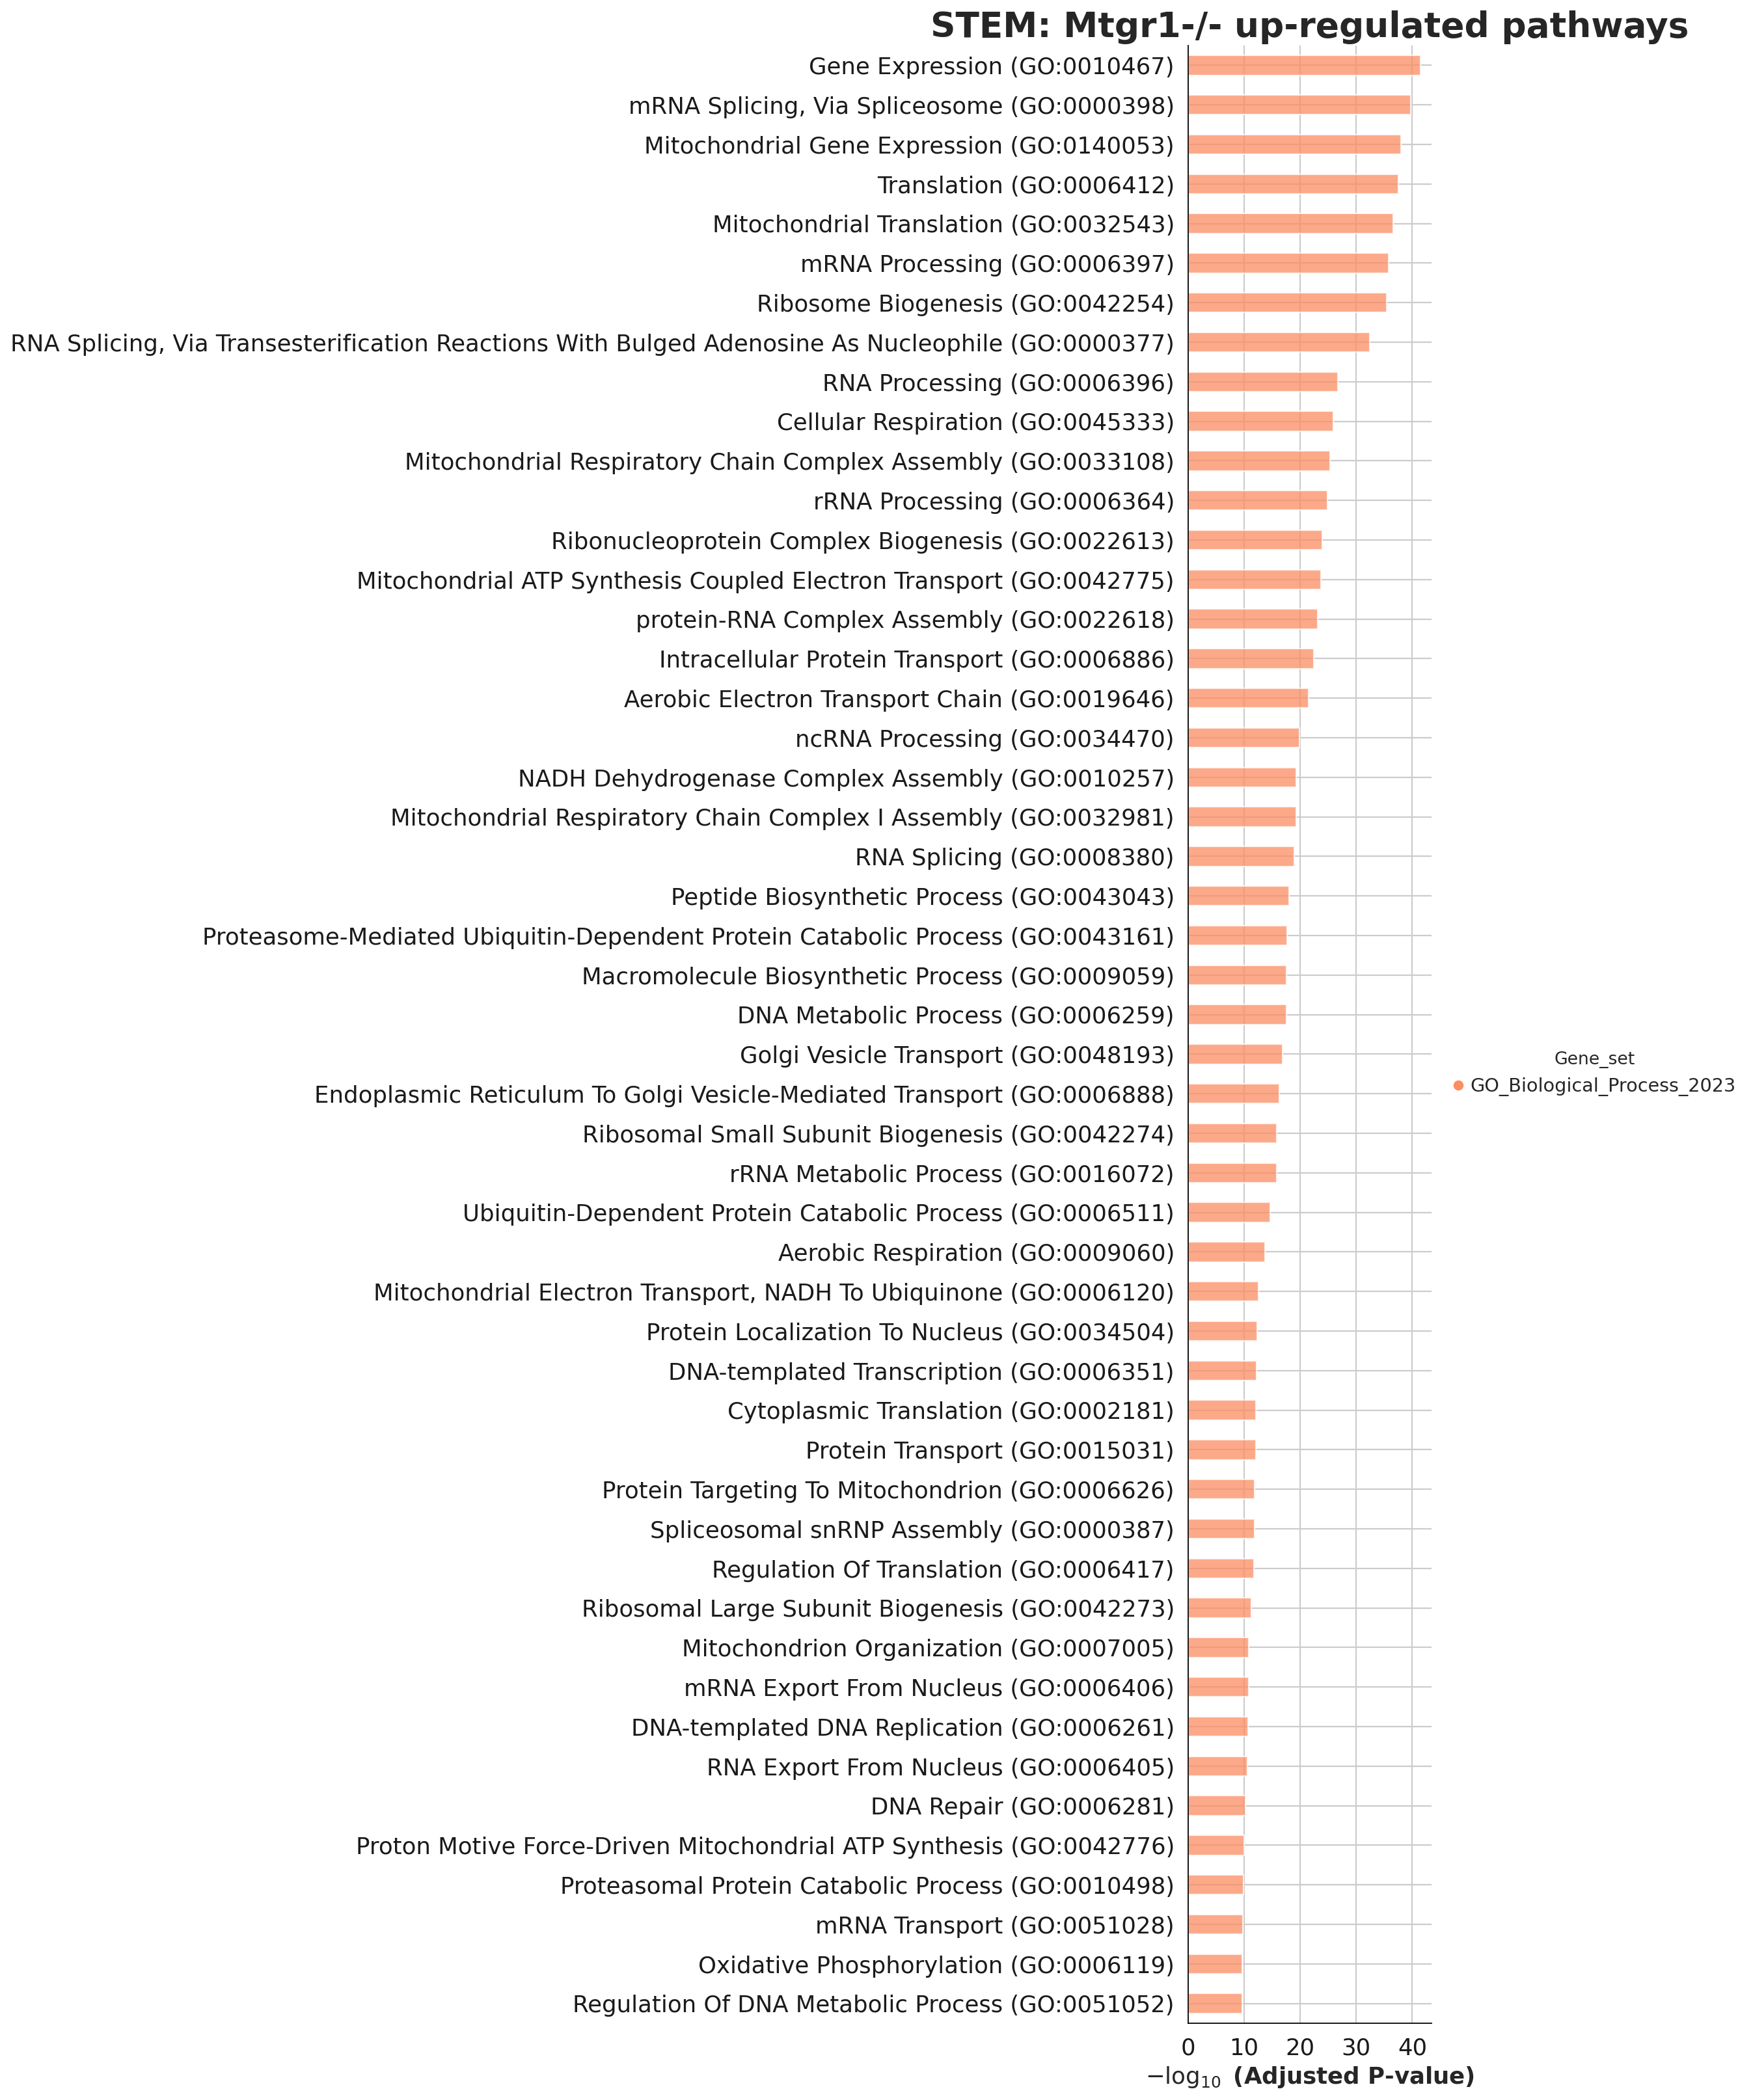

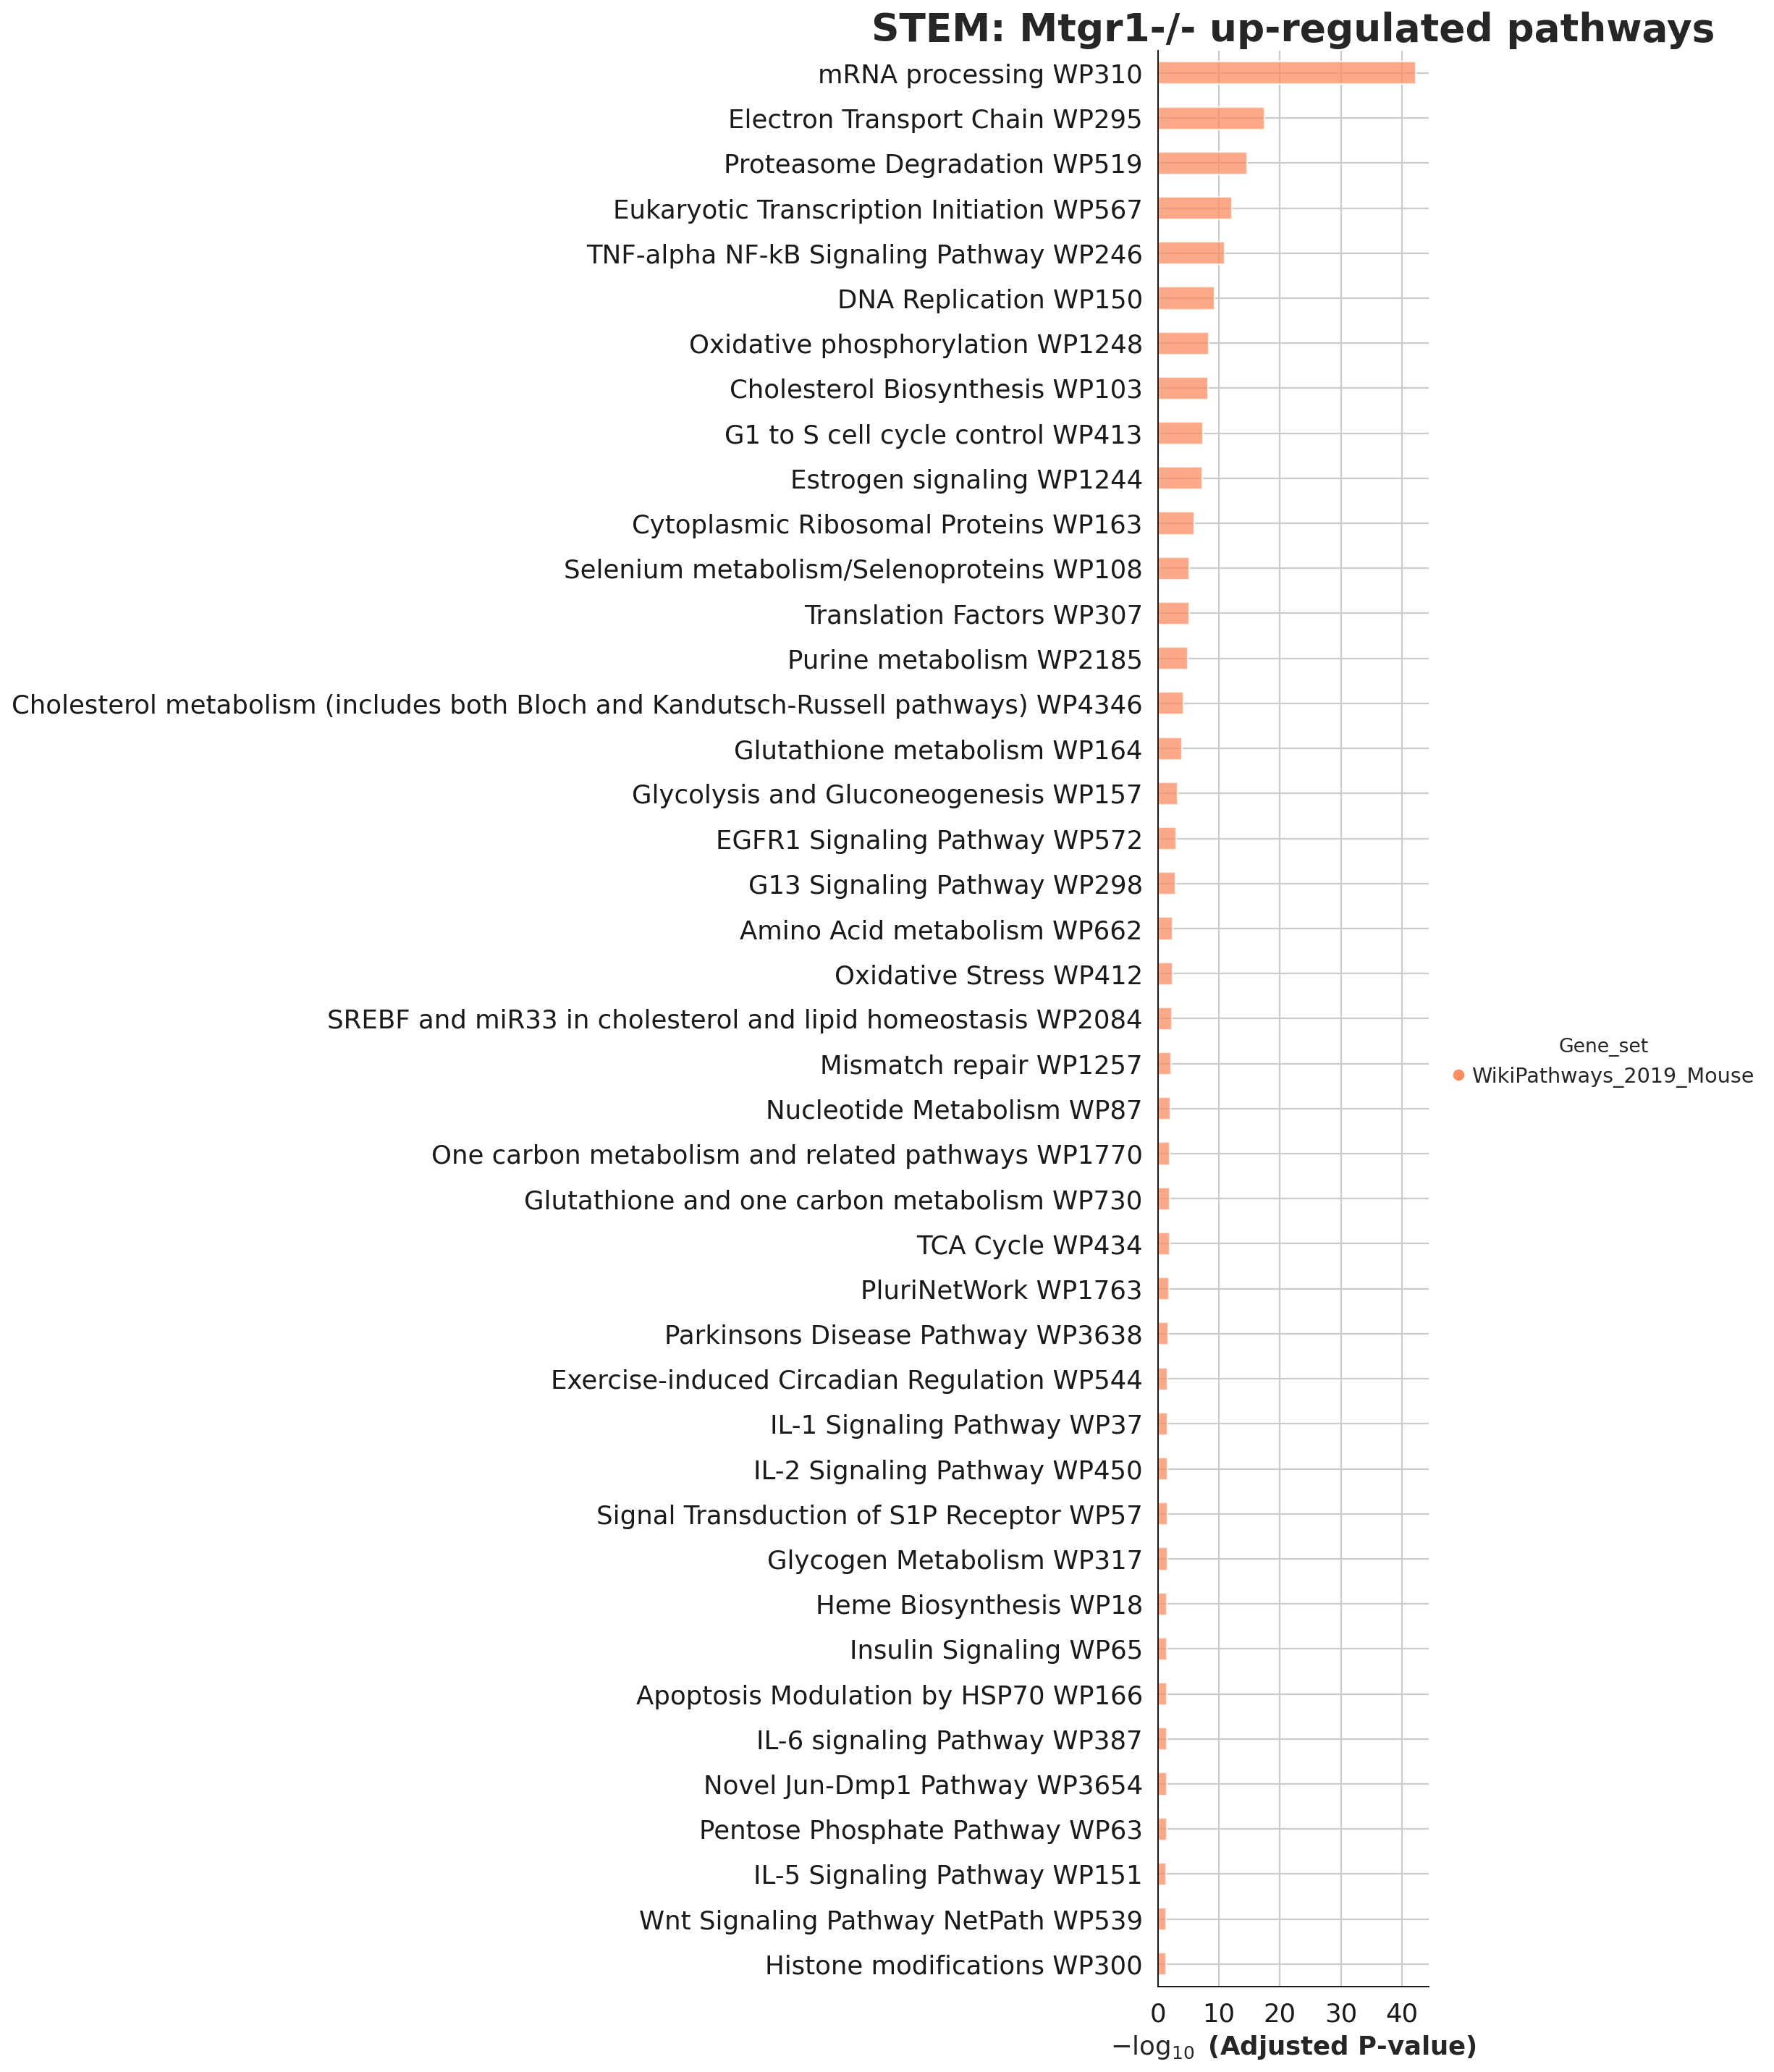

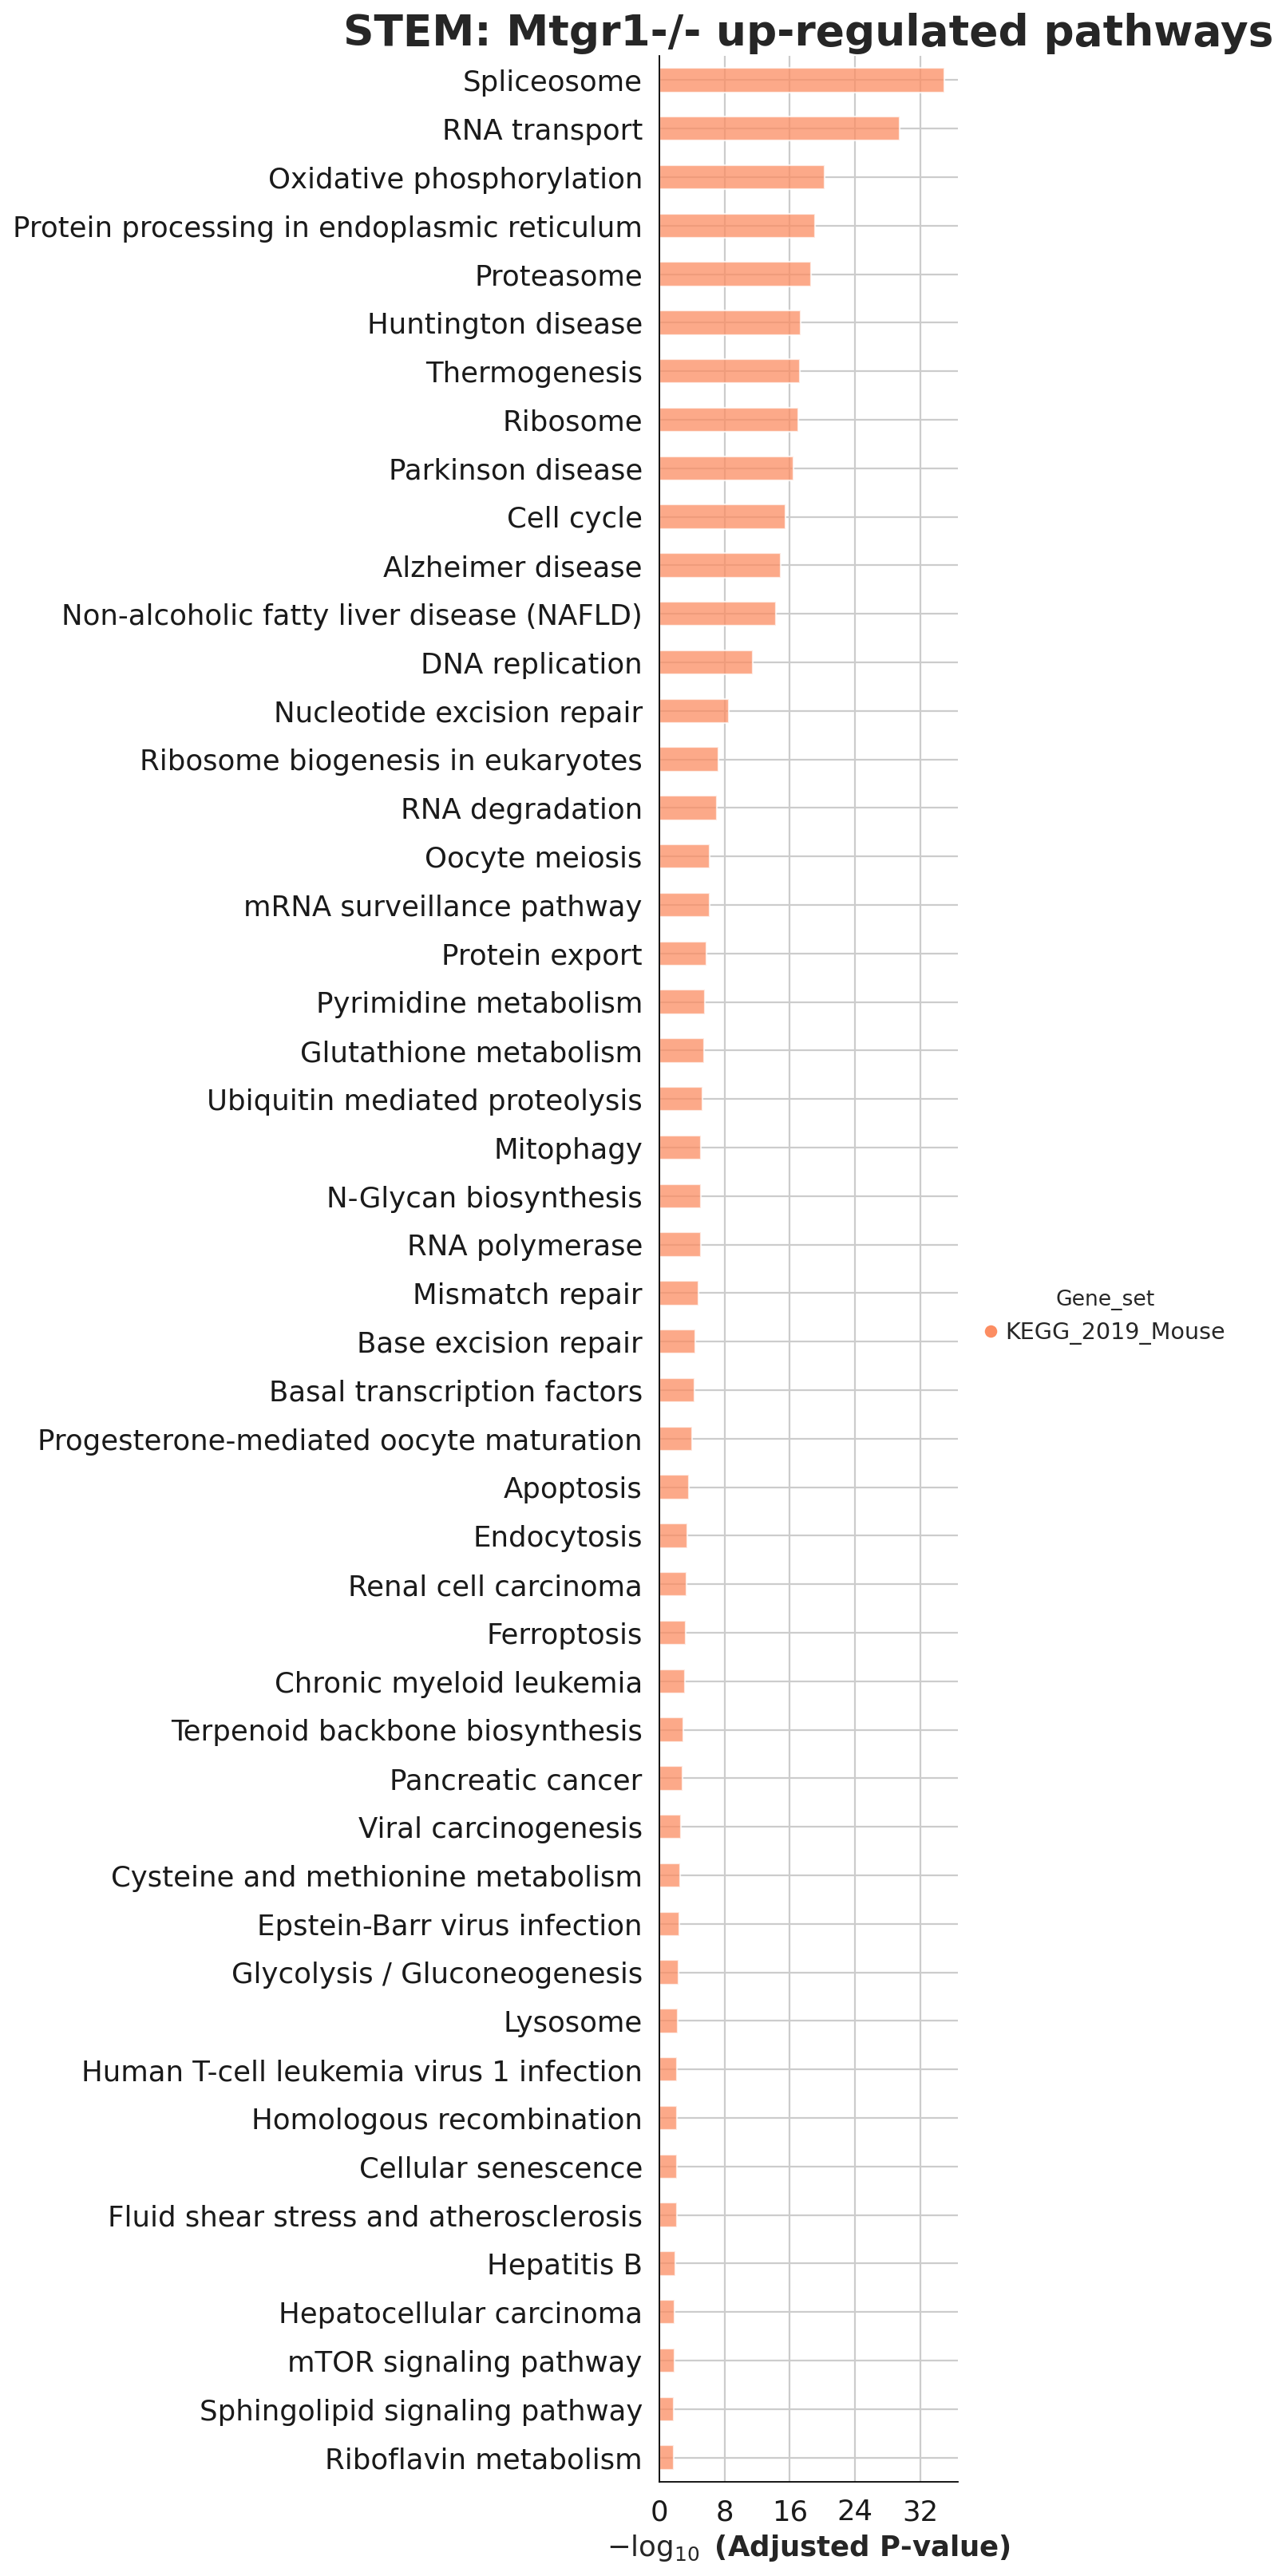

In [83]:
for er in t5_mut_enr_ls:
    significant_term = er.results[ er.results['Adjusted P-value'] < 0.05 ]
    num_terms = min( 50, significant_term.shape[0] )
    x = gp.barplot(er.results,
                   title = 'STEM: Mtgr1-/- up-regulated pathways', 
                  column="Adjusted P-value",
                  group='Gene_set', # set group, so you could do a multi-sample/library comparsion
                  size=10,
                  top_term=50,
                  figsize=(3,round( 0.5 * num_terms) ),
                   color = clr[1]
                  #color=['darkred', 'darkblue'] # set colors for group
                  #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
                 )

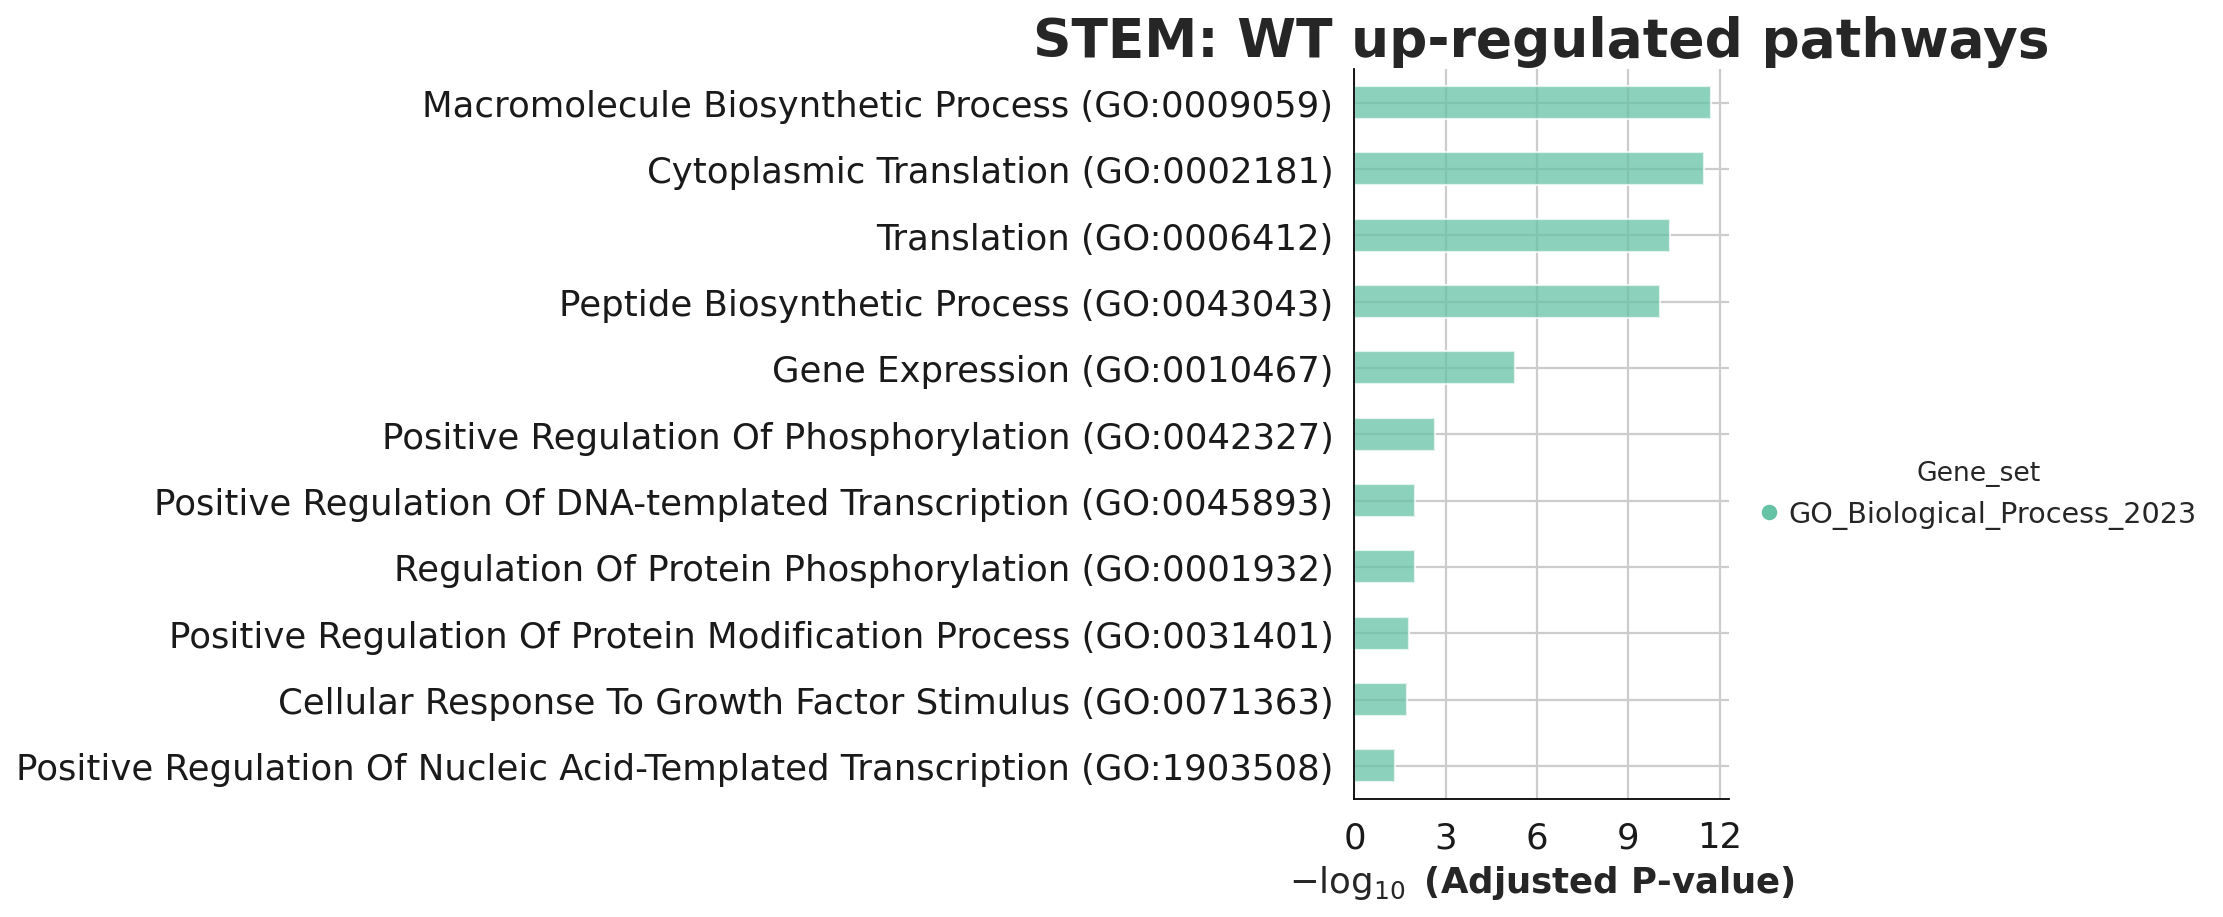

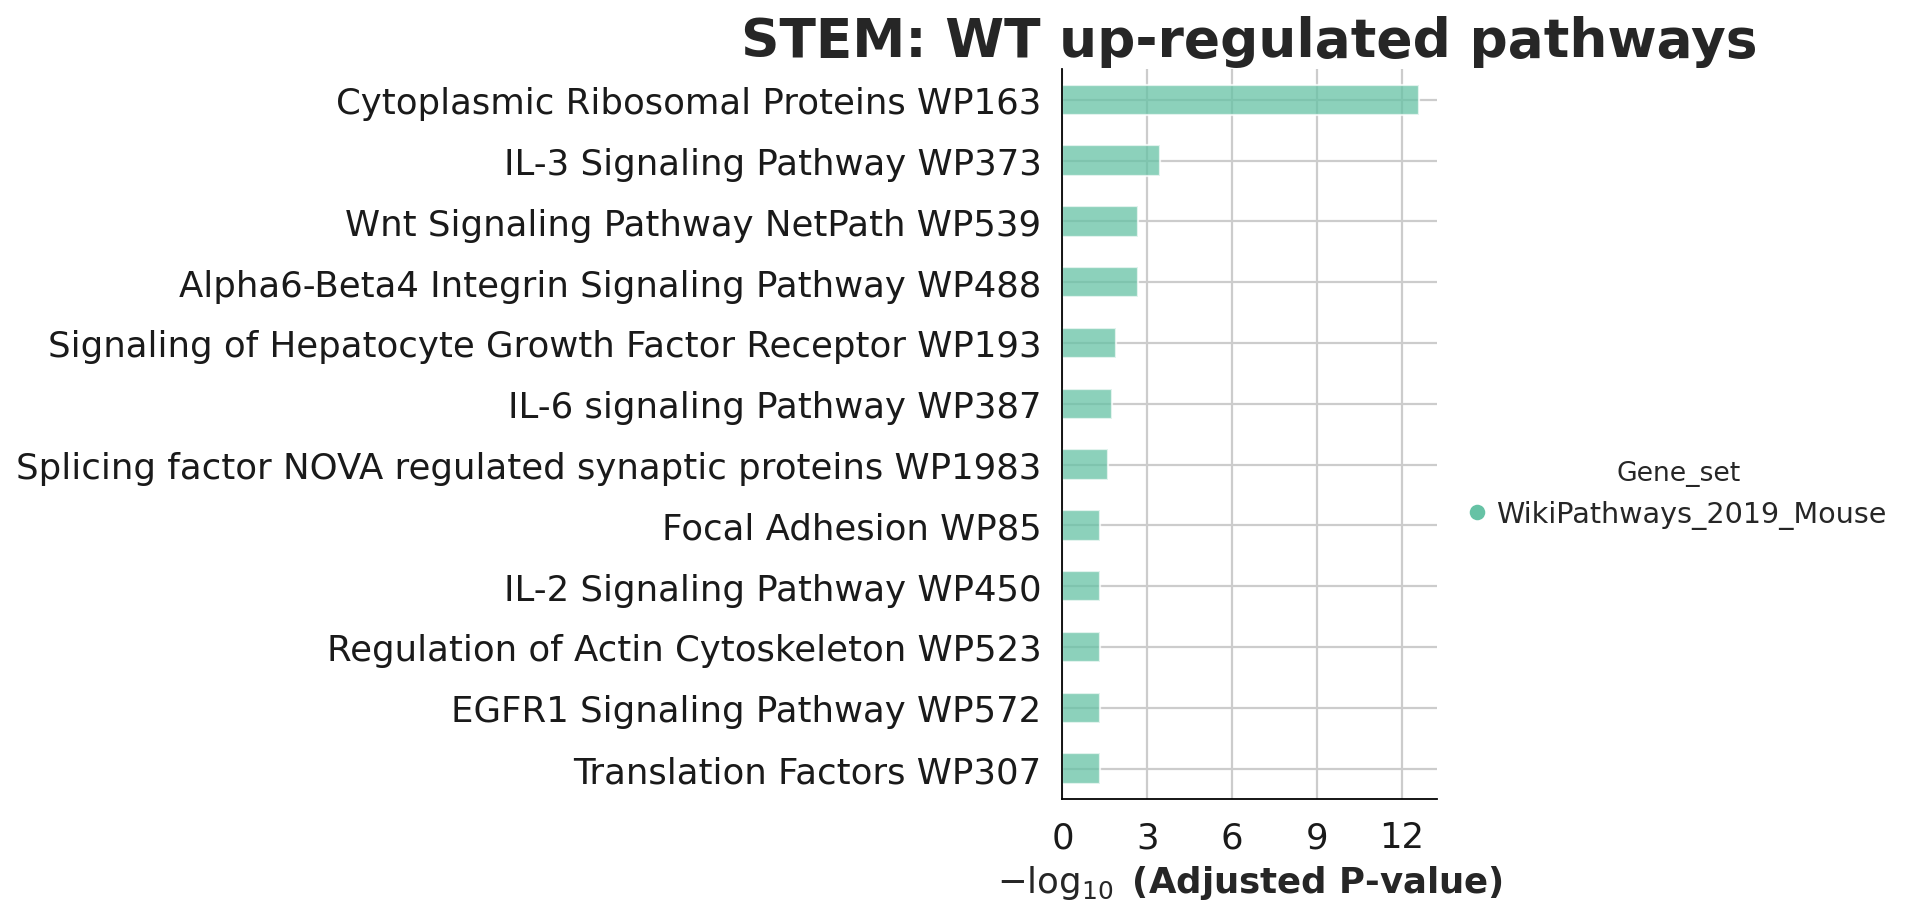

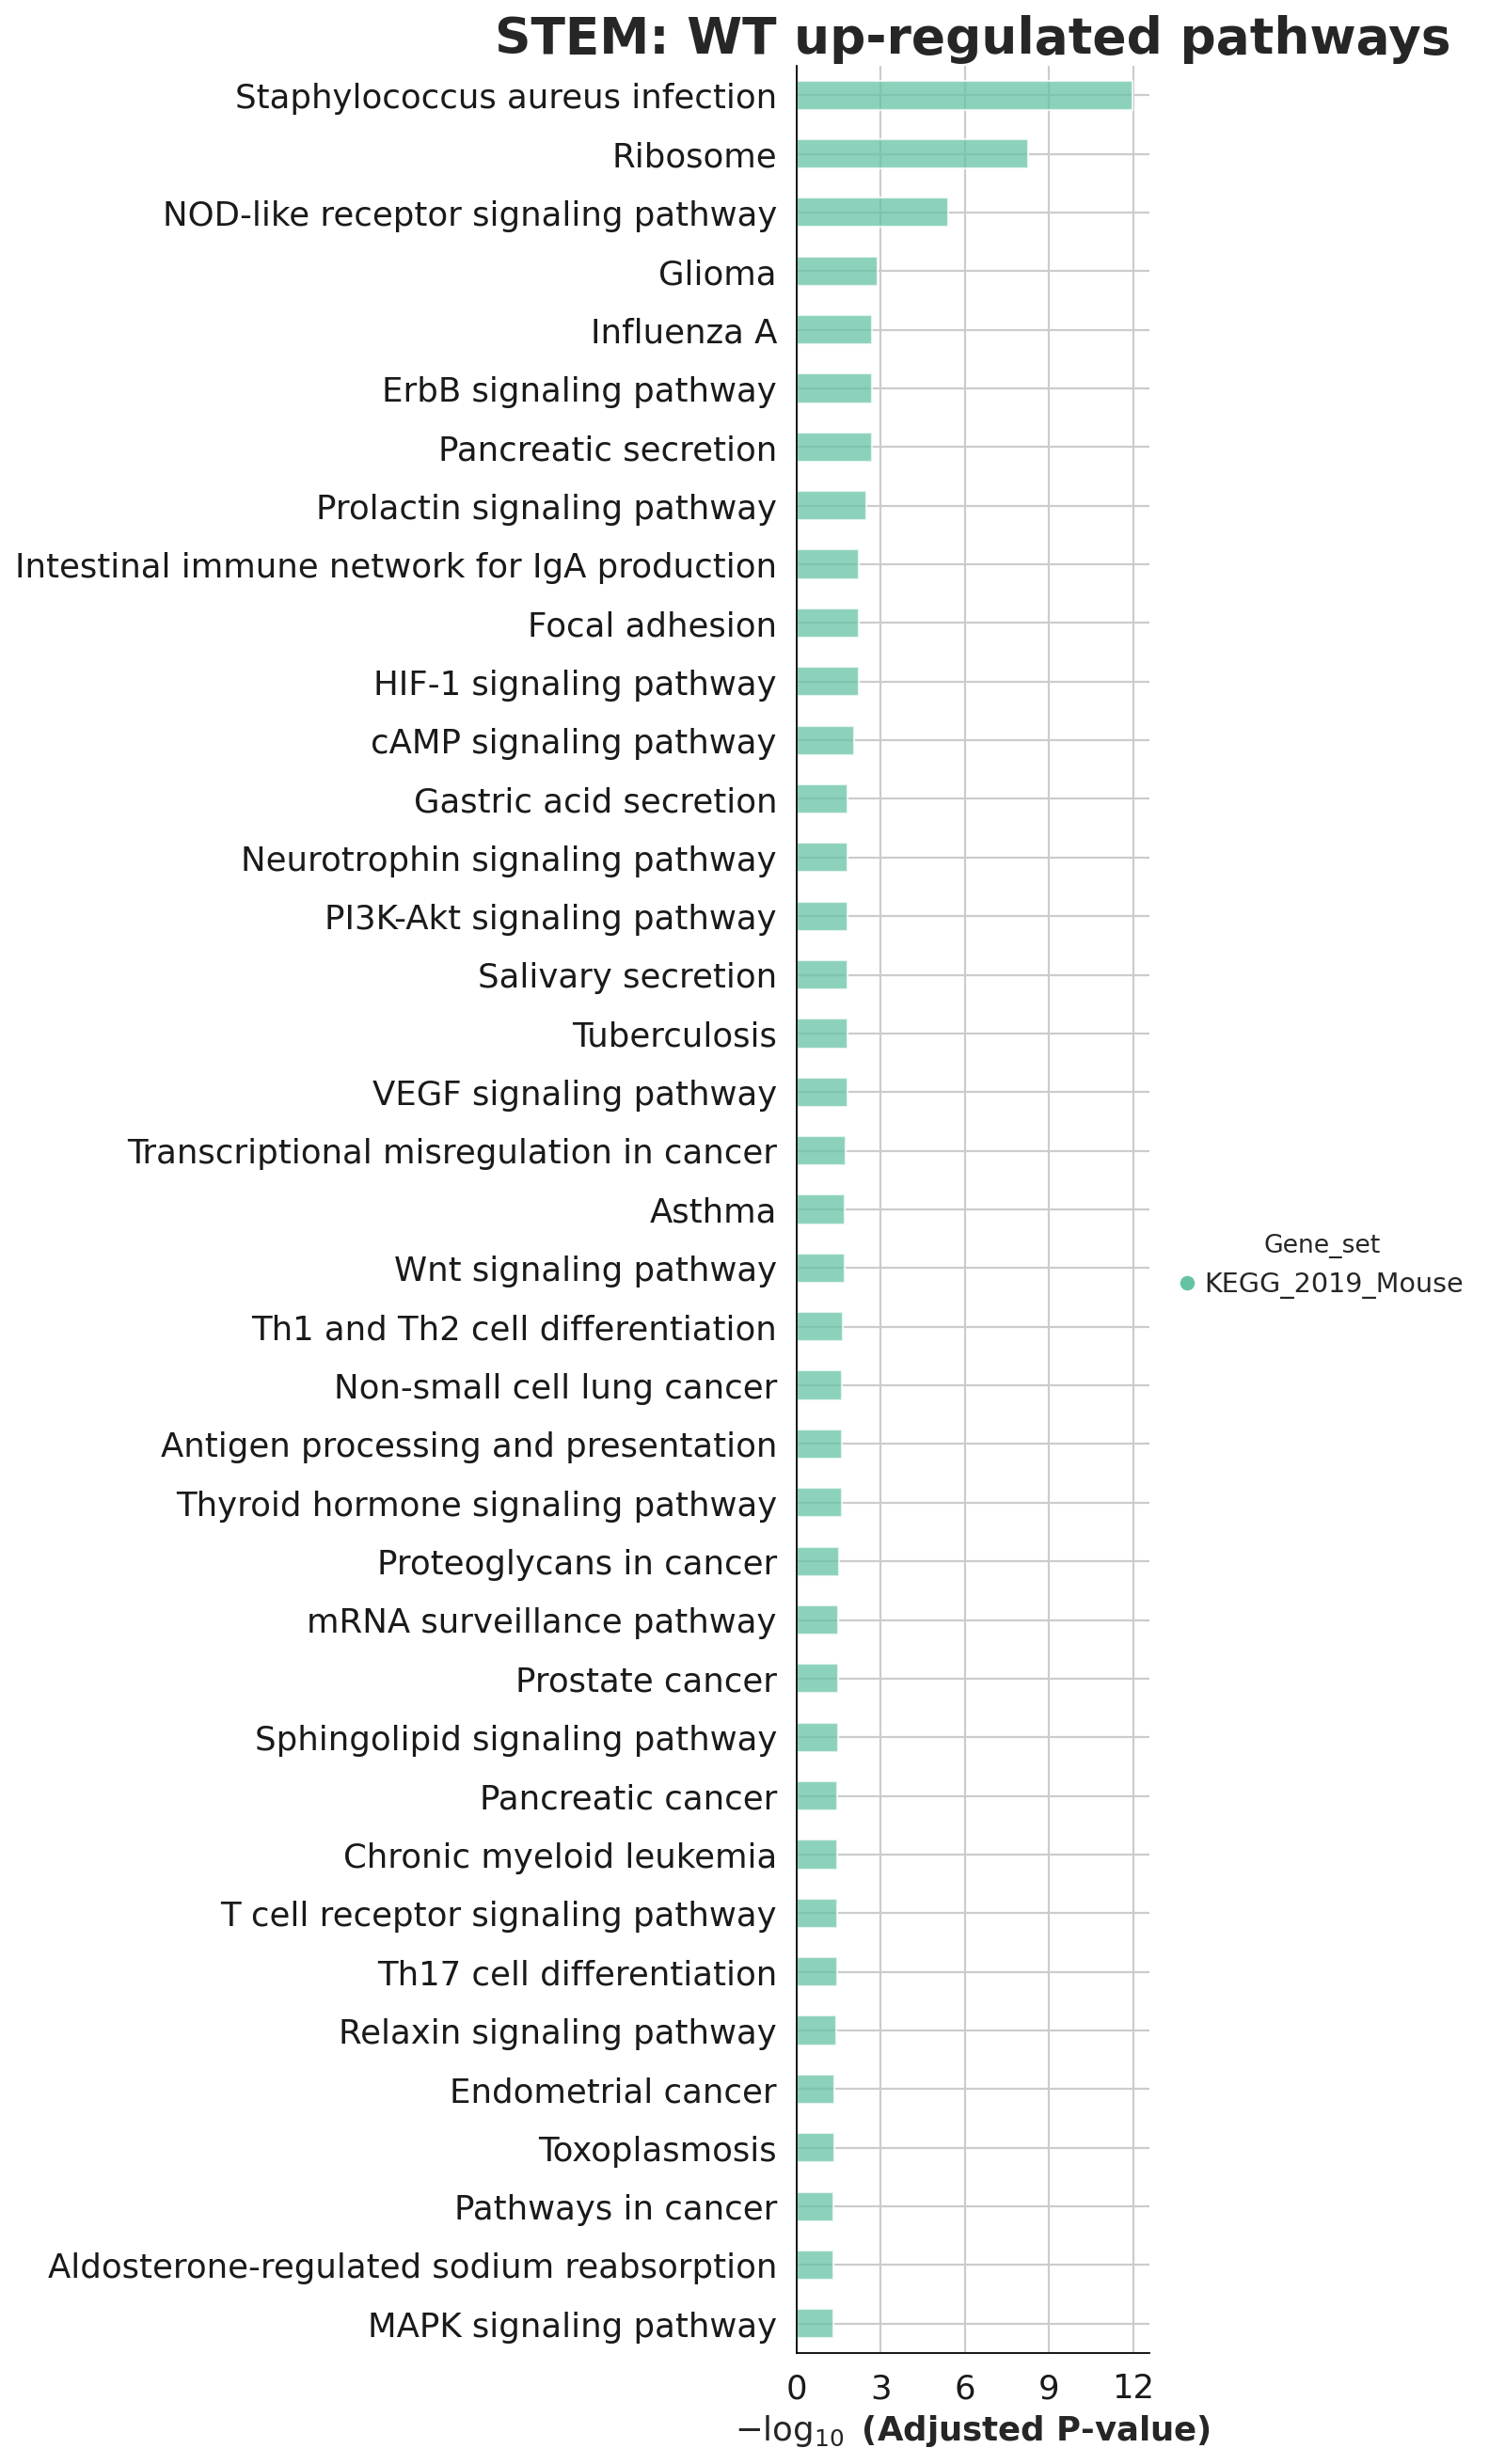

In [84]:
for er in t5_wt_enr_ls:
    significant_term = er.results[ er.results['Adjusted P-value'] < 0.05 ]
    num_terms = min( 50, significant_term.shape[0] )
    x = gp.barplot(er.results,
                   title = 'STEM: WT up-regulated pathways', 
                  column="Adjusted P-value",
                  group='Gene_set', # set group, so you could do a multi-sample/library comparsion
                  size=10,
                  top_term=50,
                  figsize=(3,round( 0.5 * num_terms) ),
                   color = clr[0]
                  #color=['darkred', 'darkblue'] # set colors for group
                  #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
                 )

### DGE ABS

### GSEA ABS

## Cell proportion

In [89]:
mut.obs['cell_type'].unique()

['TAC', 'STM', 'ABS', 'YUF', 'EE']
Categories (5, object): ['ABS', 'EE', 'STM', 'TAC', 'YUF']

In [91]:
mut.obs['cell_type'] = mut.obs['cell_type'].astype(str)
mut.obs['cell_type'][mut.obs['cell_type']=='YUF'] = 'TUF'

/tmp/ipykernel_1657114/2384508703.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  mut.obs['cell_type'] = mut.obs['cell_type'].astype(str)
/tmp/ipykernel_1657114/2384508703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mut.obs['cell_type'][mut.obs['cell_type']=='YUF'] = 'TUF'


In [94]:
comb_sub.obs['cell_type'] = comb_sub.obs['cell_type'].astype(str)
comb_sub.obs['cell_type'][comb_sub.obs['cell_type']=='YUF'] = 'TUF'

/tmp/ipykernel_1657114/2705246518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb_sub.obs['cell_type'][comb_sub.obs['cell_type']=='YUF'] = 'TUF'


In [97]:
dat_main = comb_sub[comb_sub.obs['cell_type'] != 'RevSTM' ]

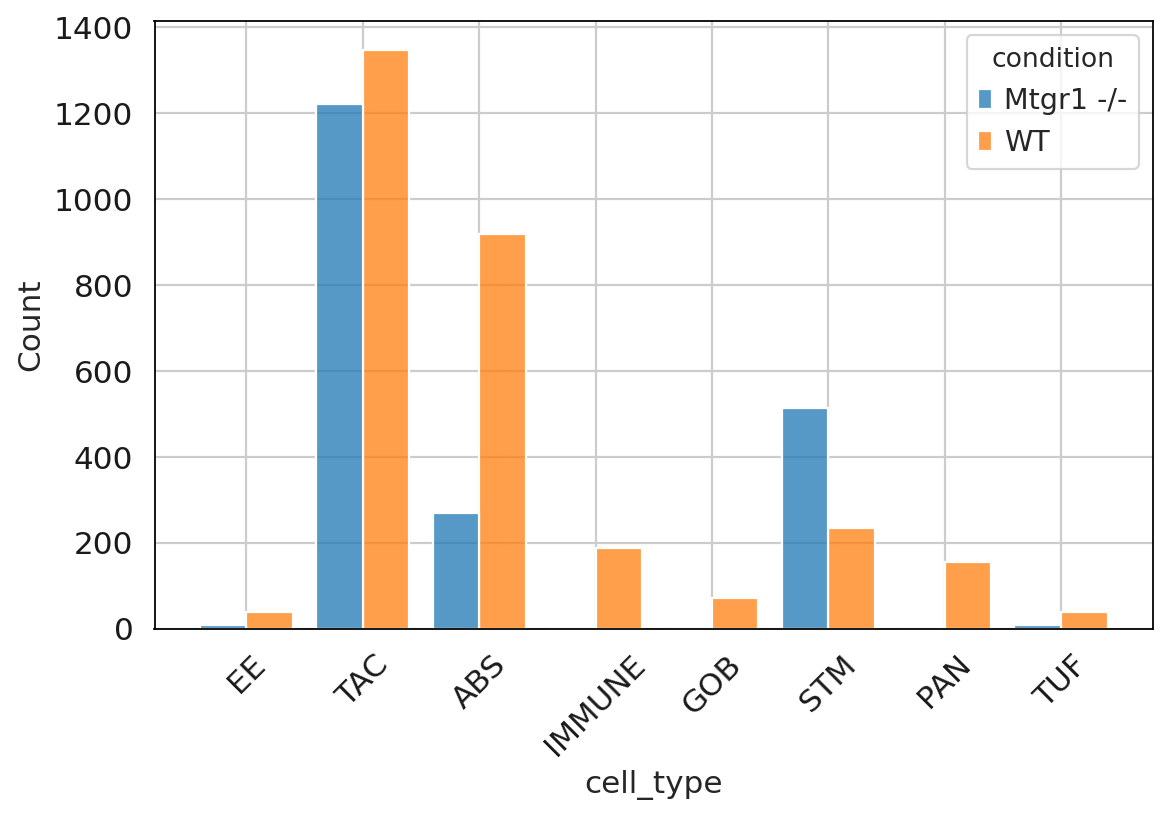

In [98]:
f,ax1 = plt.subplots(figsize = [8,5])
sn.histplot( data = dat_main.obs, x = 'cell_type', hue = 'condition', multiple='dodge', 
            #hue_order=['WT', 'Mtgr1-/-'],
            ax = ax1, shrink = 0.8, )
            #color=list( dat.uns['cell_type_colors'] ))

t = plt.xticks(rotation=45)

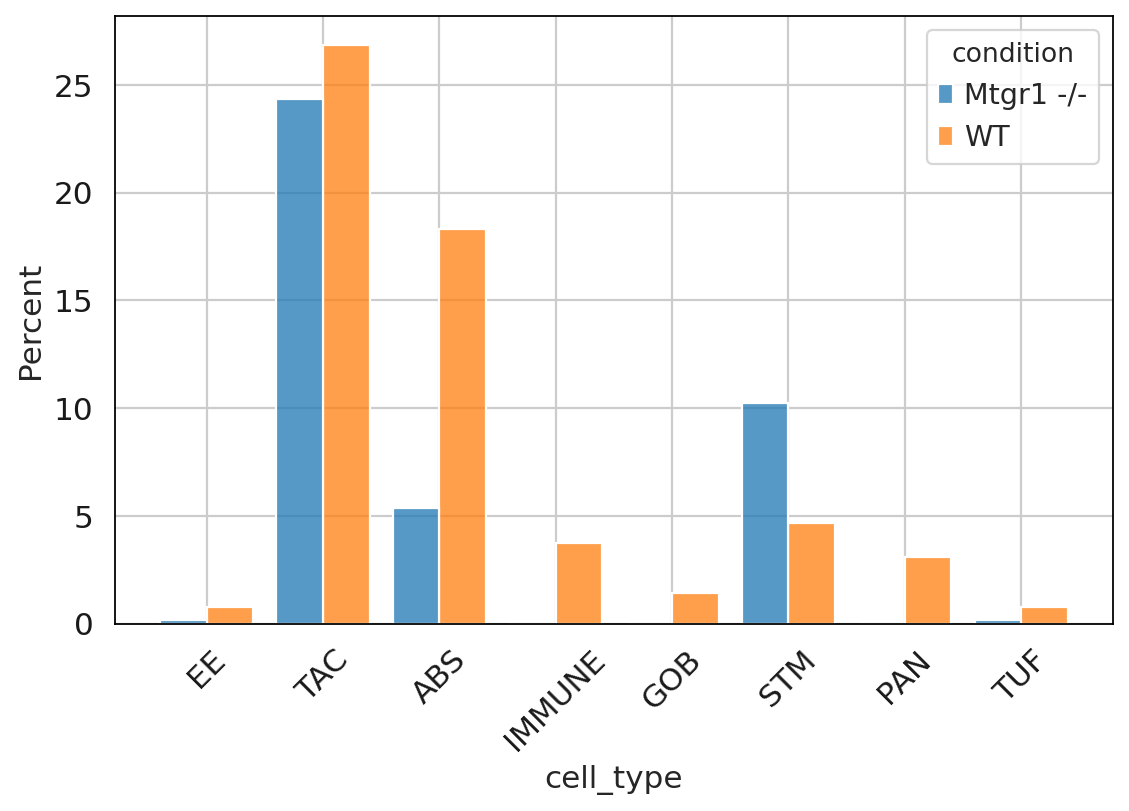

In [99]:
f,ax1 = plt.subplots(figsize = [8,5])
sn.histplot( data = dat_main.obs, x = 'cell_type', hue = 'condition', multiple='dodge', 
            #hue_order=['WT', 'Mtgr1-/-'],
            stat='percent',
            ax = ax1, shrink = 0.8)
            #color=list( dat.uns['condition_colors'] ))

t = plt.xticks(rotation=45)

In [123]:
#sc.pl.umap( comb_sub, color = 'condition')

### re-do composition plot with only epithelial cells and 100 percent for each condition

In [5]:
dat = sc.read("new_sample_10868_filtered/subsample_combined_dat1246.h5ad")

In [6]:
dat.X.sum( axis = 1)

matrix([[ 2369.],
        [ 1005.],
        [12943.],
        ...,
        [ 2622.],
        [ 2611.],
        [ 2605.]], dtype=float32)

In [27]:
dat

AnnData object with n_obs × n_vars = 5025 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment', 'condition'
    uns: 'condition_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'arcsinh', 'raw_counts'

In [28]:
dat.obs['condition'].value_counts()

condition
WT           3000
Mtgr1 -/-    2025
Name: count, dtype: int64

In [29]:
dat.obs[['condition', 'cell_type']].groupby( ['condition','cell_type']).value_counts()

condition  cell_type
Mtgr1 -/-  ABS           270
           EE             10
           GOB             0
           IMMUNE          0
           PAN             0
           RevSTM          0
           STM           514
           TAC          1221
           TUF            10
WT         ABS           919
           EE             38
           GOB            72
           IMMUNE        189
           PAN           156
           RevSTM          6
           STM           234
           TAC          1348
           TUF            38
Name: count, dtype: int64

In [40]:
dat_epi = dat[dat.obs['cell_type'] != 'IMMUNE']
dat_epi = dat_epi[dat_epi.obs['cell_type'] != 'RevSTM']

In [56]:
dat_epi

AnnData object with n_obs × n_vars = 4830 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment', 'condition'
    uns: 'condition_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'arcsinh', 'raw_counts'

In [57]:
cell_count_df = dat_epi.obs[['cell_type',  'condition']]

In [58]:
group_count_df = cell_count_df.groupby( ['condition','cell_type']).value_counts()

In [59]:
type( group_count_df ) #series
group_count_df = pd.DataFrame( group_count_df)

In [60]:
group_count_df.index[0]

('Mtgr1 -/-', 'ABS')

In [61]:
condition_counts = dat_epi.obs['condition'].value_counts()
condition_counts

condition
WT           2805
Mtgr1 -/-    2025
Name: count, dtype: int64

In [62]:
condition_counts['WT']

2805

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


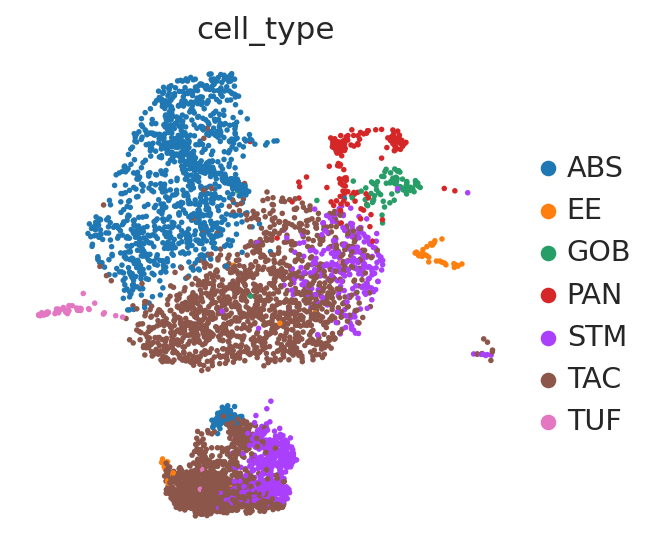

In [63]:
sc.pl.umap( dat_epi, color = 'cell_type' )

In [64]:
group_count_df

count
condition cell_type       
Mtgr1 -/- ABS          270
          EE            10
          GOB            0
          PAN            0
          STM          514
          TAC         1221
          TUF           10
WT        ABS          919
          EE            38
          GOB           72
          PAN          156
          STM          234
          TAC         1348
          TUF           38

In [65]:
pct_count = []
for i in group_count_df.index:
    if ( i[0] == 'WT'):
        pct_count.append( group_count_df.loc[i, 'count']/condition_counts['WT'] )
    else:
        pct_count.append( group_count_df.loc[i, 'count']/condition_counts['Mtgr1 -/-'] )

In [66]:
group_count_df['pct_count'] = pct_count

In [67]:
group_count_df

count  pct_count
condition cell_type                  
Mtgr1 -/- ABS          270   0.133333
          EE            10   0.004938
          GOB            0   0.000000
          PAN            0   0.000000
          STM          514   0.253827
          TAC         1221   0.602963
          TUF           10   0.004938
WT        ABS          919   0.327629
          EE            38   0.013547
          GOB           72   0.025668
          PAN          156   0.055615
          STM          234   0.083422
          TAC         1348   0.480570
          TUF           38   0.013547

In [74]:
group_count_df['condition'] = [ i[0] for i in group_count_df.index ]
group_count_df['cell_type'] = [ i[1] for i in group_count_df.index ]

In [77]:
group_count_df.reset_index(drop = True)

count  pct_count  condition cell_type
0     270   0.133333  Mtgr1 -/-       ABS
1      10   0.004938  Mtgr1 -/-        EE
2       0   0.000000  Mtgr1 -/-       GOB
3       0   0.000000  Mtgr1 -/-       PAN
4     514   0.253827  Mtgr1 -/-       STM
5    1221   0.602963  Mtgr1 -/-       TAC
6      10   0.004938  Mtgr1 -/-       TUF
7     919   0.327629         WT       ABS
8      38   0.013547         WT        EE
9      72   0.025668         WT       GOB
10    156   0.055615         WT       PAN
11    234   0.083422         WT       STM
12   1348   0.480570         WT       TAC
13     38   0.013547         WT       TUF

In [99]:
x = np.arange(0, 10, step=1.5)
x[0:7]

array([0. , 1.5, 3. , 4.5, 6. , 7.5, 9. ])

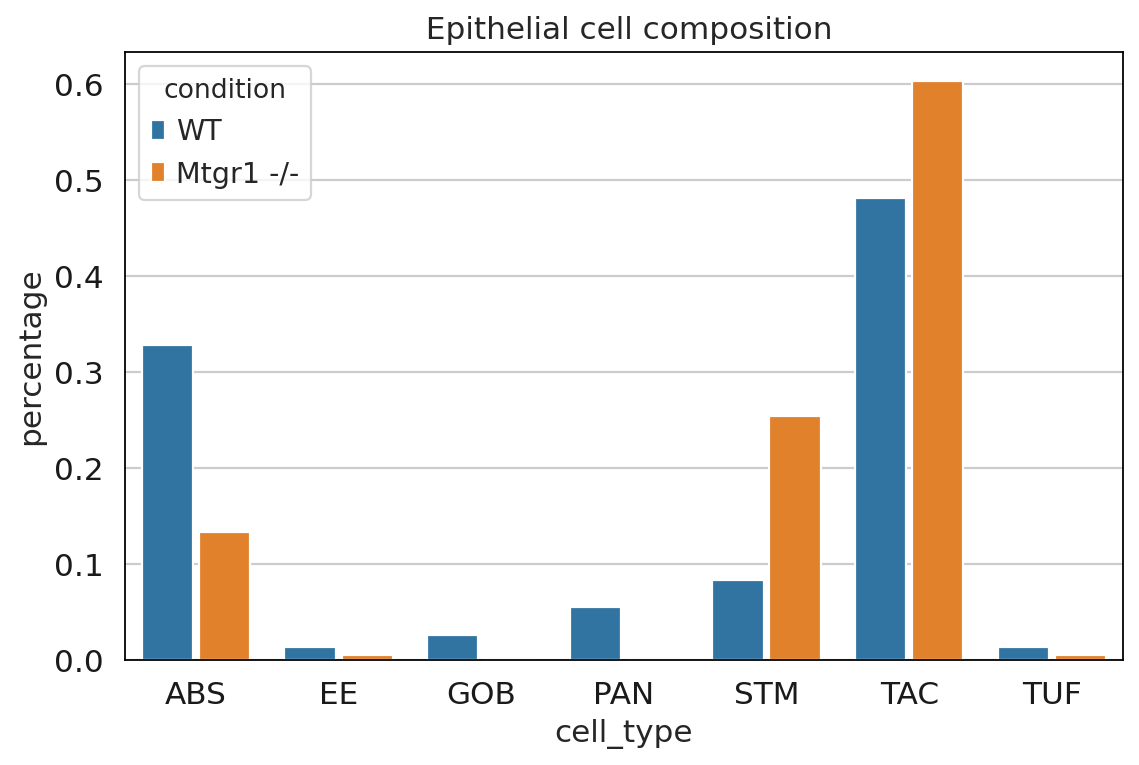

In [116]:
f,ax = plt.subplots(figsize = [8,5])
sn.barplot( data = group_count_df, x = 'cell_type', y = 'pct_count', hue = 'condition',
           hue_order=['WT', 'Mtgr1 -/-'],
            dodge=True, width=0.8, ax = ax, gap = 0.1 )
t= ax.set_ylabel( "percentage")
t = ax.set_title(" Epithelial cell composition")
loc, lab = plt.xticks()
#plt.xticks(np.arange(0, 1, step=0.2)) 
#plt.xticks(ticks = x[0:7] )


In [109]:
#print( loc, lab)

## ABS brushborder marker

In [104]:
brush_border_marker = pd.read_csv("./selected_brush_border_genes.csv", header = None, index_col = None)
brush_border_marker.head()

0
0  Actb
1  Plec
2  Vil1
3  Pls1
4   Ezr

In [100]:
comb_sub.X = comb_sub.raw.X

In [101]:
ab = comb_sub[comb_sub.obs['cell_type'] == 'ABS' ]

In [102]:
ab

View of AnnData object with n_obs × n_vars = 1189 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment', 'condition'
    obsm: 'X_pca', 'X_umap'
    layers: 'arcsinh', 'raw_counts'

In [106]:
ab.X.sum(axis = 1)

matrix([[12943.],
        [14757.],
        [10489.],
        ...,
        [ 2914.],
        [ 2904.],
        [ 2884.]], dtype=float32)

In [107]:
ab.raw = ab.copy()

In [108]:
sc.pp.normalize_total( ab )

In [109]:
brush_border_df = ab.to_df( )[brush_border_marker[0]]

In [110]:
brush_border_df.head(2)

Genes                          Actb      Plec      Vil1      Pls1       Ezr   
Cells                                                                         
ACACCCCCCACACCAG_10868_2  22.903654  0.000000  1.065286  1.597929  1.065286  \
CCCAACCCAGTCCCTC_10868_1  28.030087  0.467168  4.204513  1.401504  2.803009   

Genes                        Krt20  Dsp    Sptan1     Actn4    Sptbn1  ...   
Cells                                                                  ...   
ACACCCCCCACACCAG_10868_2  3.195859  0.0  0.532643  2.663216  0.000000  ...  \
CCCAACCCAGTCCCTC_10868_1  5.606018  0.0  1.401504  5.138849  0.467168  ...   

Genes                       Eps8l3      Eps8     Actr3      Flnb  Cobl   
Cells                                                                    
ACACCCCCCACACCAG_10868_2  0.532643  1.597929  1.065286  1.065286   0.0  \
CCCAACCCAGTCCCTC_10868_1  0.000000  0.934336  1.868672  0.467168   0.0   

Genes                         Tprn      Cap1  Baiap2l1     Cdhr2     Cdhr5  
Cells                                                                       
ACACCCCCCACACCAG_10868_2  0.532643  0.532643  0.532643  0.532643  0.532643  
CCCAACCCAGTCCCTC_10868_1  0.000000  0.934336  0.000000  0.934336  1.401504  

[2 rows x 22 columns]

In [111]:
len( brush_border_df.columns )

22

In [113]:
df2 = pd.DataFrame()
for c in range( len( brush_border_df.columns) ):
    scaled_df = zc.scale_column( brush_border_df, brush_border_df.columns[c], "scaled_"+ brush_border_df.columns[c] )
    df2[brush_border_df.columns[c] ] = scaled_df[ "scaled_"+ brush_border_df.columns[c] ]

In [114]:
df2.head()

Actb      Plec      Vil1      Pls1       Ezr   
Cells                                                                        
ACACCCCCCACACCAG_10868_2  0.123409  0.000000  0.027320  0.053414  0.039094  \
CCCAACCCAGTCCCTC_10868_1  0.151031  0.014962  0.107827  0.046848  0.102866   
AAAAACGCAACGATGT_10868_3  0.141658  0.021051  0.101135  0.087880  0.096482   
ATGGCCGCACGGAGAT_10868_3  0.074861  0.000000  0.071262  0.046442  0.050988   
ATCAAATACCATATGC_10868_2  0.137218  0.000000  0.136063  0.070939  0.000000   

                             Krt20       Dsp    Sptan1     Actn4    Sptbn1   
Cells                                                                        
ACACCCCCCACACCAG_10868_2  0.049906  0.000000  0.060264  0.079644  0.000000  \
CCCAACCCAGTCCCTC_10868_1  0.087543  0.000000  0.158569  0.153678  0.047723   
AAAAACGCAACGATGT_10868_3  0.051319  0.081180  0.000000  0.196555  0.134284   
ATGGCCGCACGGAGAT_10868_3  0.108481  0.000000  0.000000  0.000000  0.000000   
ATCAAATACCATATGC_10868_2  0.099421  0.043687  0.000000  0.126930  0.216792   

                          ...    Eps8l3      Eps8     Actr3      Flnb  Cobl   
Cells                     ...                                                 
ACACCCCCCACACCAG_10868_2  ...  0.029463  0.075691  0.090203  0.099436   0.0  \
CCCAACCCAGTCCCTC_10868_1  ...  0.000000  0.044258  0.158230  0.043606   0.0   
AAAAACGCAACGATGT_10868_3  ...  0.109067  0.031133  0.278268  0.122700   0.0   
ATGGCCGCACGGAGAT_10868_3  ...  0.076851  0.000000  0.235288  0.259371   0.0   
ATCAAATACCATATGC_10868_2  ...  0.058694  0.050263  0.089849  0.099046   0.0   

                              Tprn      Cap1  Baiap2l1     Cdhr2     Cdhr5  
Cells                                                                       
ACACCCCCCACACCAG_10868_2  0.032411  0.045662  0.057496  0.014620  0.015929  
CCCAACCCAGTCCCTC_10868_1  0.000000  0.080098  0.000000  0.025645  0.041912  
AAAAACGCAACGATGT_10868_3  0.039994  0.056345  0.070947  0.072160  0.078622  
ATGGCCGCACGGAGAT_10868_3  0.000000  0.000000  0.149973  0.000000  0.000000  
ATCAAATACCATATGC_10868_2  0.064568  0.272895  0.000000  0.029125  0.031733  

[5 rows x 22 columns]

In [116]:
#max(df2['Actb'])

In [117]:
df2['condition'] = ab.obs['condition'] 

In [118]:
brush_border_df['condition'] = ab.obs['condition'] 

In [125]:
#sc.pl.umap( ab, color = 'condition')

In [127]:
#ab

In [140]:
new_brush_genes = df2.columns[0:-1]

In [141]:
new_brush_genes

Index(['Actb', 'Plec', 'Vil1', 'Pls1', 'Ezr', 'Krt20', 'Dsp', 'Sptan1',
       'Actn4', 'Sptbn1', 'Cltc', 'Ctnna1', 'Eps8l3', 'Eps8', 'Actr3', 'Flnb',
       'Cobl', 'Tprn', 'Cap1', 'Baiap2l1', 'Cdhr2', 'Cdhr5'],
      dtype='object')

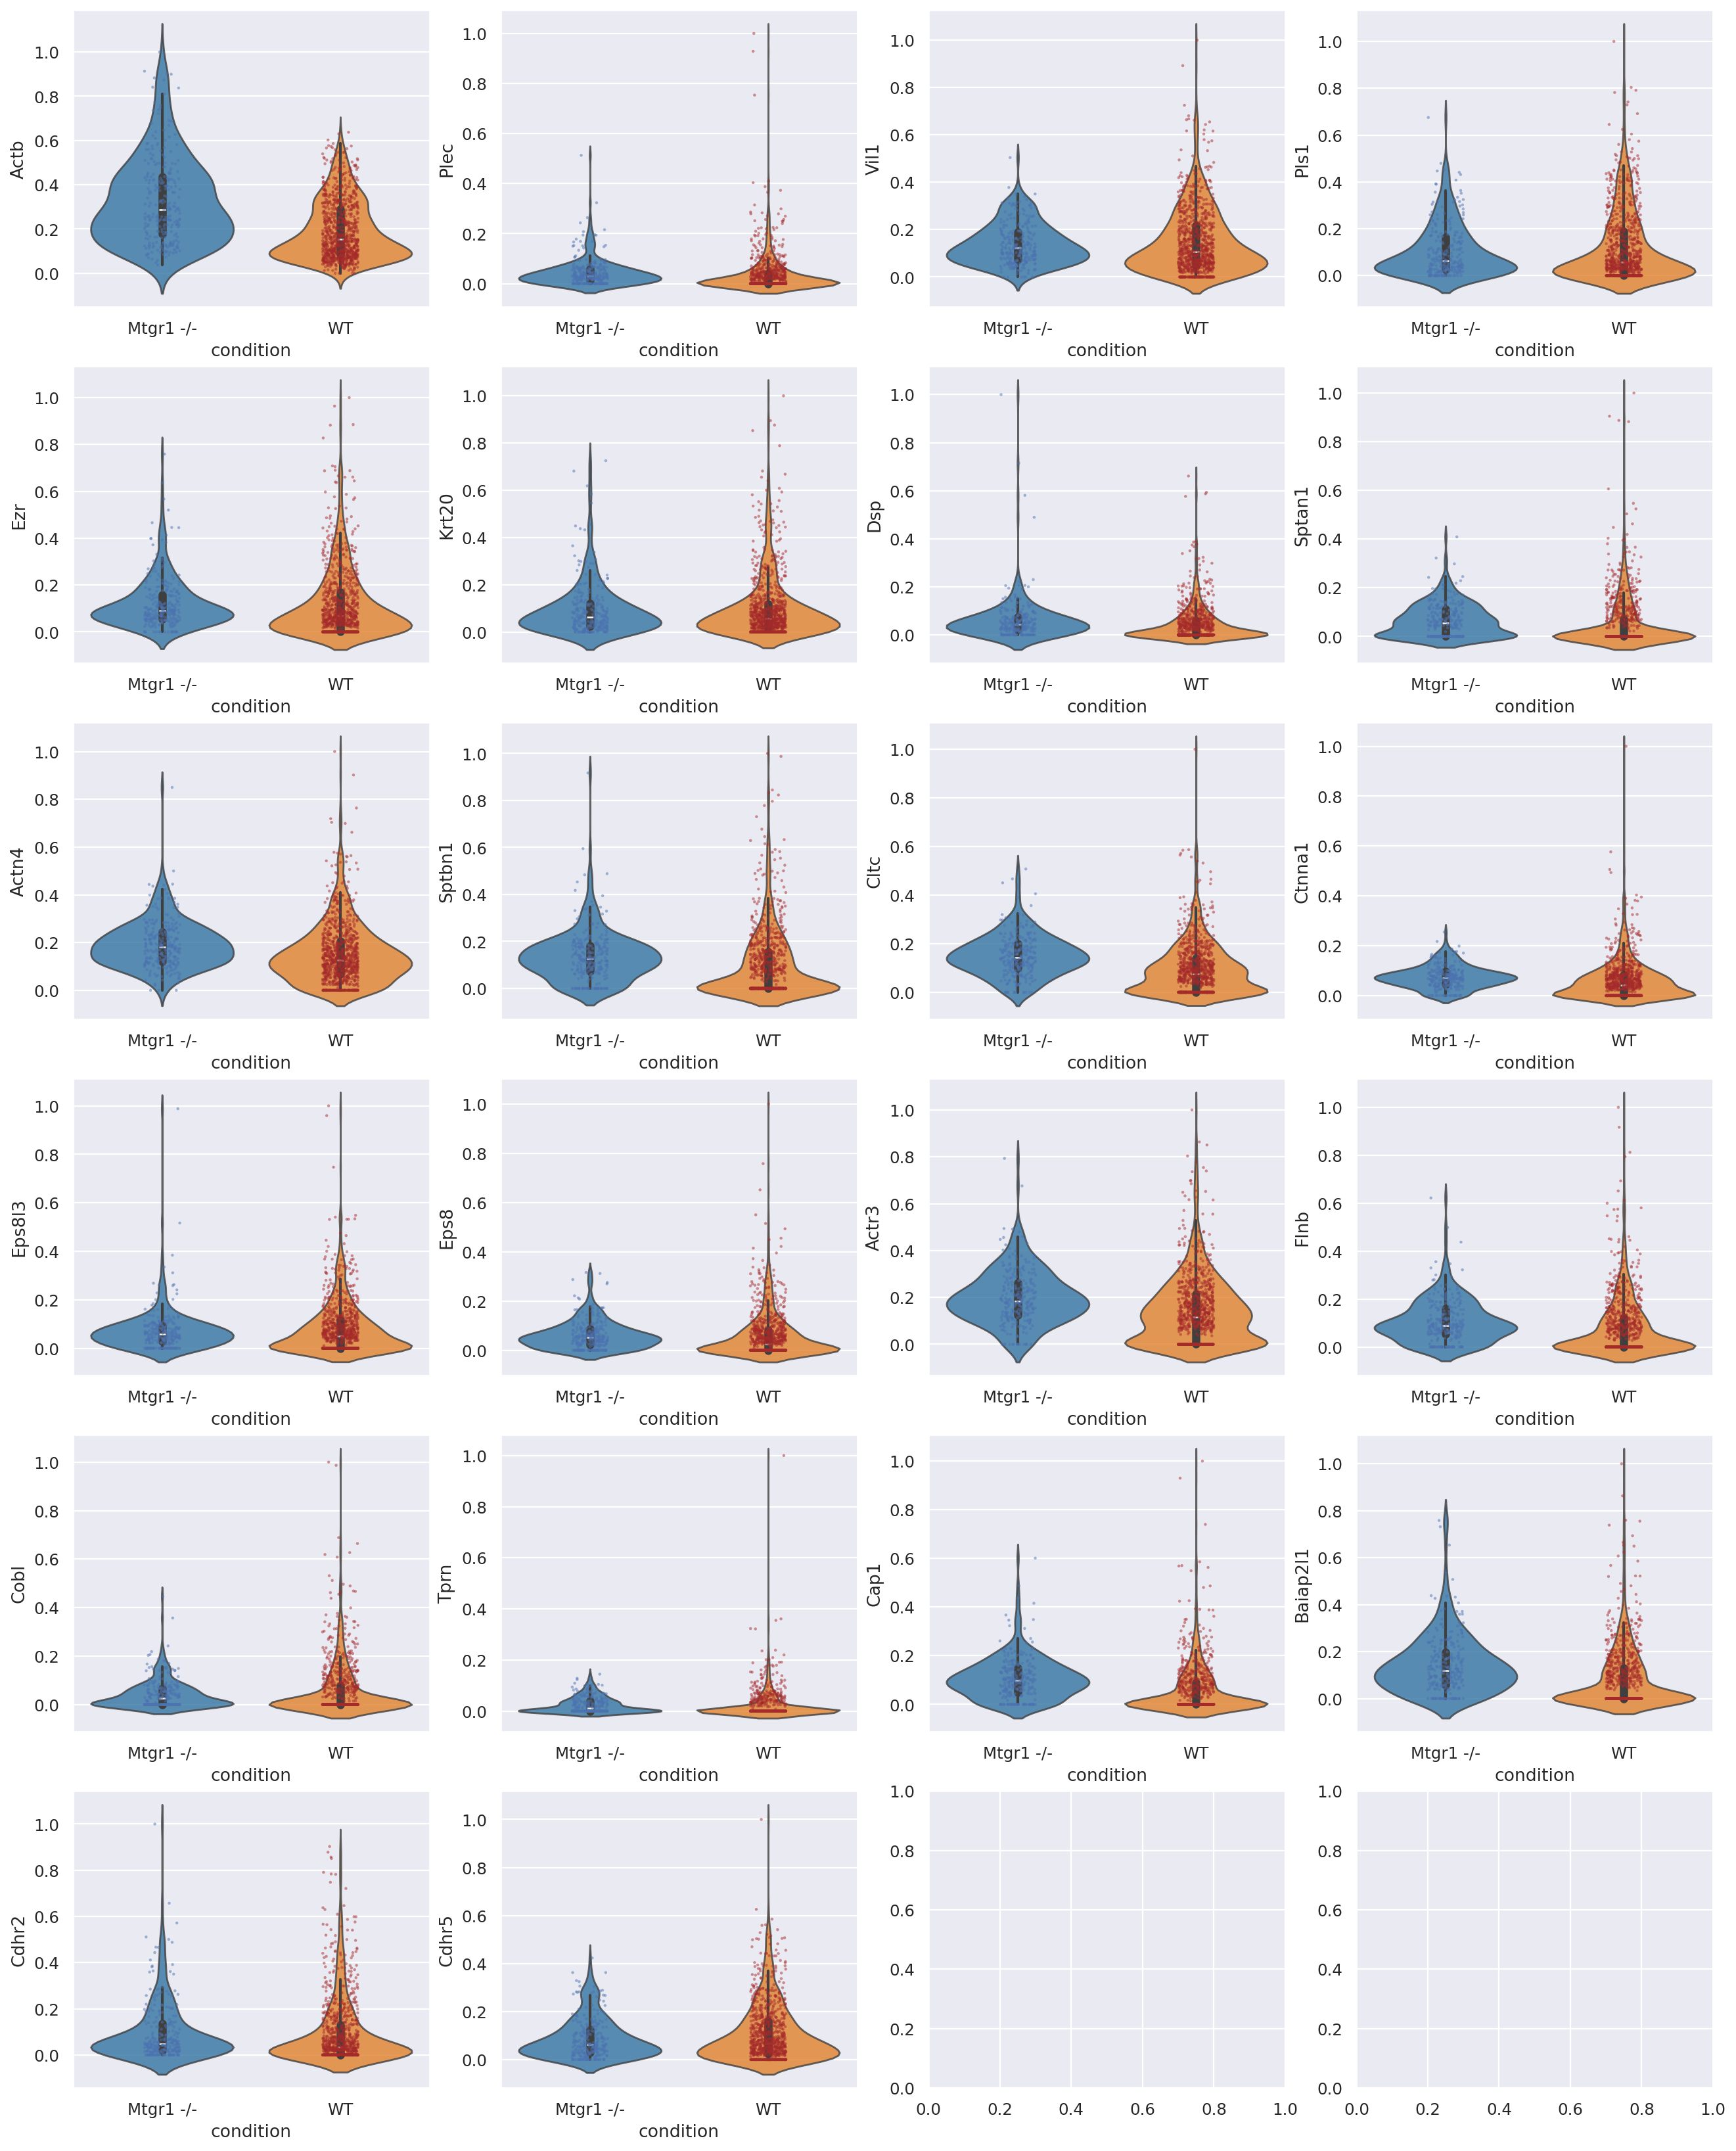

In [142]:
f,axs = plt.subplots( nrows=6, ncols=4, figsize = [20, 26])
sn.set(font_scale=1)

axs = axs.ravel()
for i in range( len( new_brush_genes) ):
    c = new_brush_genes[i]
    
    sn.violinplot( data = df2,  x = 'condition', y = c, 
               palette=list( ab.uns['condition_colors']), hue = 'condition',
              ax = axs[i], alpha = 0.8)
    sn.stripplot( data = df2,  x = 'condition', y = c, 
              palette = ['b', 'brown'], hue = 'condition',
              ax = axs[i], size = 2, alpha = 0.5)
    axs[i].set( ylabel= c)


In [144]:
ab

AnnData object with n_obs × n_vars = 1189 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment', 'condition'
    uns: 'condition_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'arcsinh', 'raw_counts'

In [145]:
ab.X = ab.raw.X

In [146]:
zc.normalization( ab)

AnnData object with n_obs × n_vars = 1189 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment', 'condition'
    var: 'mean', 'std'
    uns: 'condition_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'arcsinh', 'raw_counts'

In [147]:
sc.tl.score_genes( ab, gene_list= new_brush_genes, score_name='brush_border', use_raw = False, ctrl_size = 100 )

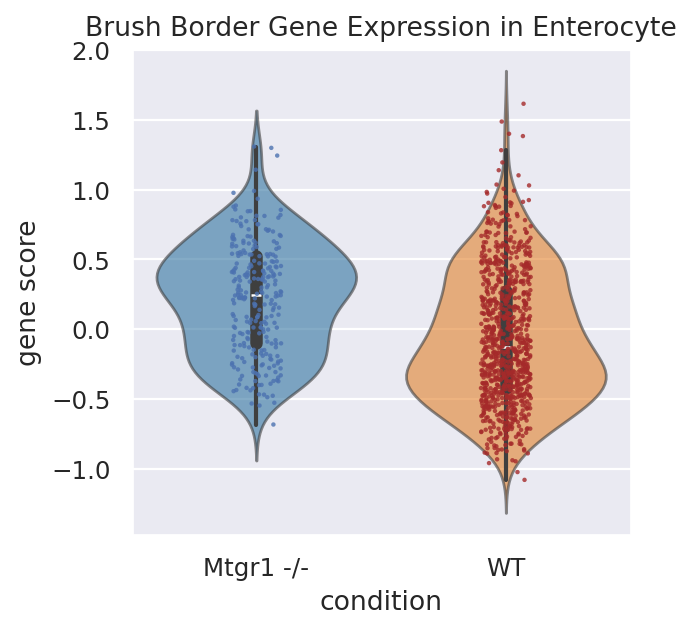

In [155]:
f,ax1 = plt.subplots( )
sn.violinplot( data = ab.obs,  x = 'condition', y = 'brush_border', 
               palette=list( ab.uns['condition_colors']), hue = 'condition',
              ax = ax1, alpha = 0.6)
sn.stripplot( data = ab.obs,  x = 'condition', y = 'brush_border',
              palette = ['b', 'brown'], hue = 'condition',
              ax = ax1, size = 2, alpha = 0.8)
t = ax1.set_ylabel("gene score")
t = ax1.set_title("Brush Border Gene Expression in Enterocyte")

## t-sne

In [117]:
dat

AnnData object with n_obs × n_vars = 5025 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment', 'condition'
    uns: 'condition_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'arcsinh', 'raw_counts'

In [158]:
wt = dat[dat.obs['treatment'] == 'WT' ]
mut = dat[dat.obs['treatment'] == 'Mut' ]

In [160]:
dat.X.sum(axis = 1)

matrix([[ 2369.],
        [ 1005.],
        [12943.],
        ...,
        [ 2622.],
        [ 2611.],
        [ 2605.]], dtype=float32)

In [161]:
ret = zc.normalization( wt)

/home/lucy/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [162]:
wt

AnnData object with n_obs × n_vars = 3000 × 21860
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden', 'cell_type', 'treatment', 'condition'
    var: 'mean', 'std'
    uns: 'condition_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'arcsinh', 'raw_counts'

In [163]:
zc.clustering( wt)

In [164]:
sc.tl.tsne( wt,n_pcs=50 , perplexity =25 )

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f05e81b19d0>
Traceback (most recent call last):
  File "/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


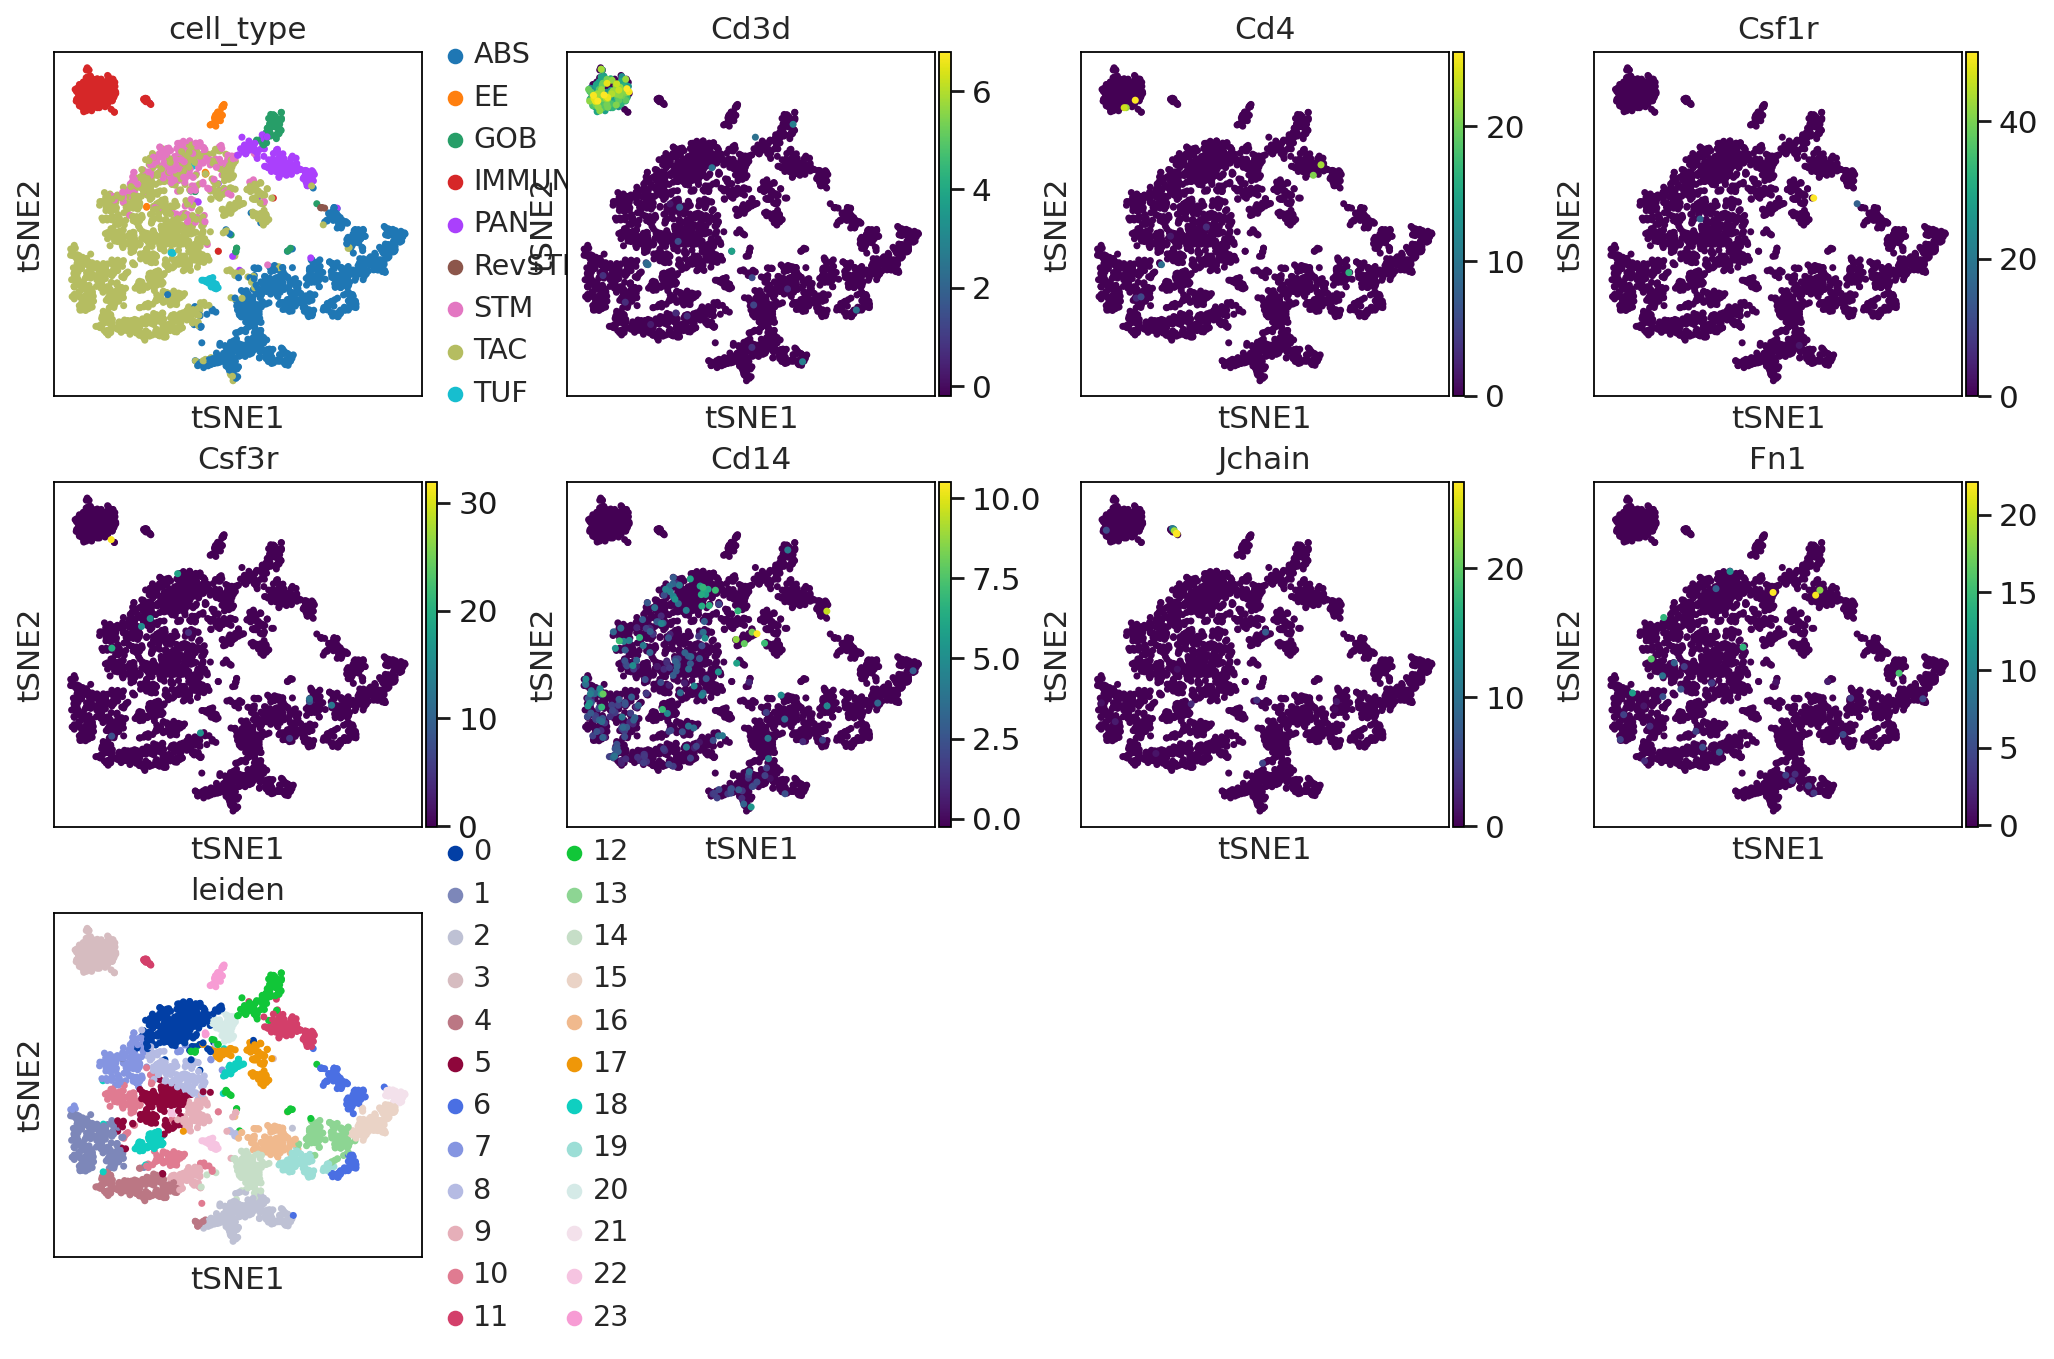

In [154]:
sc.pl.tsne( wt, color = ['cell_type', 'Cd3d', 'Cd4', 'Csf1r', 'Csf3r', 'Cd14', 'Jchain',  'Fn1', 'leiden'], use_raw = False)

In [149]:
sc.tl.leiden( wt, resolution=2)

In [145]:
zc_filter.mouse_non_epi

{'T': ['Cd3d', 'Cd4', 'Trbc2', 'Cd96', 'Cd247'],
 'MYE': ['Csf1r', 'Csf3r', 'Cd14', 'Mrc1'],
 'MAS': ['Kit', 'Krt1'],
 'B': ['Cd19', 'Ms4a1'],
 'PLAS': ['Igha1', 'Igha2', 'Jchain'],
 'END': ['Vwf', 'Mcam'],
 'FIB': ['Col1a1', 'Fn1']}

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


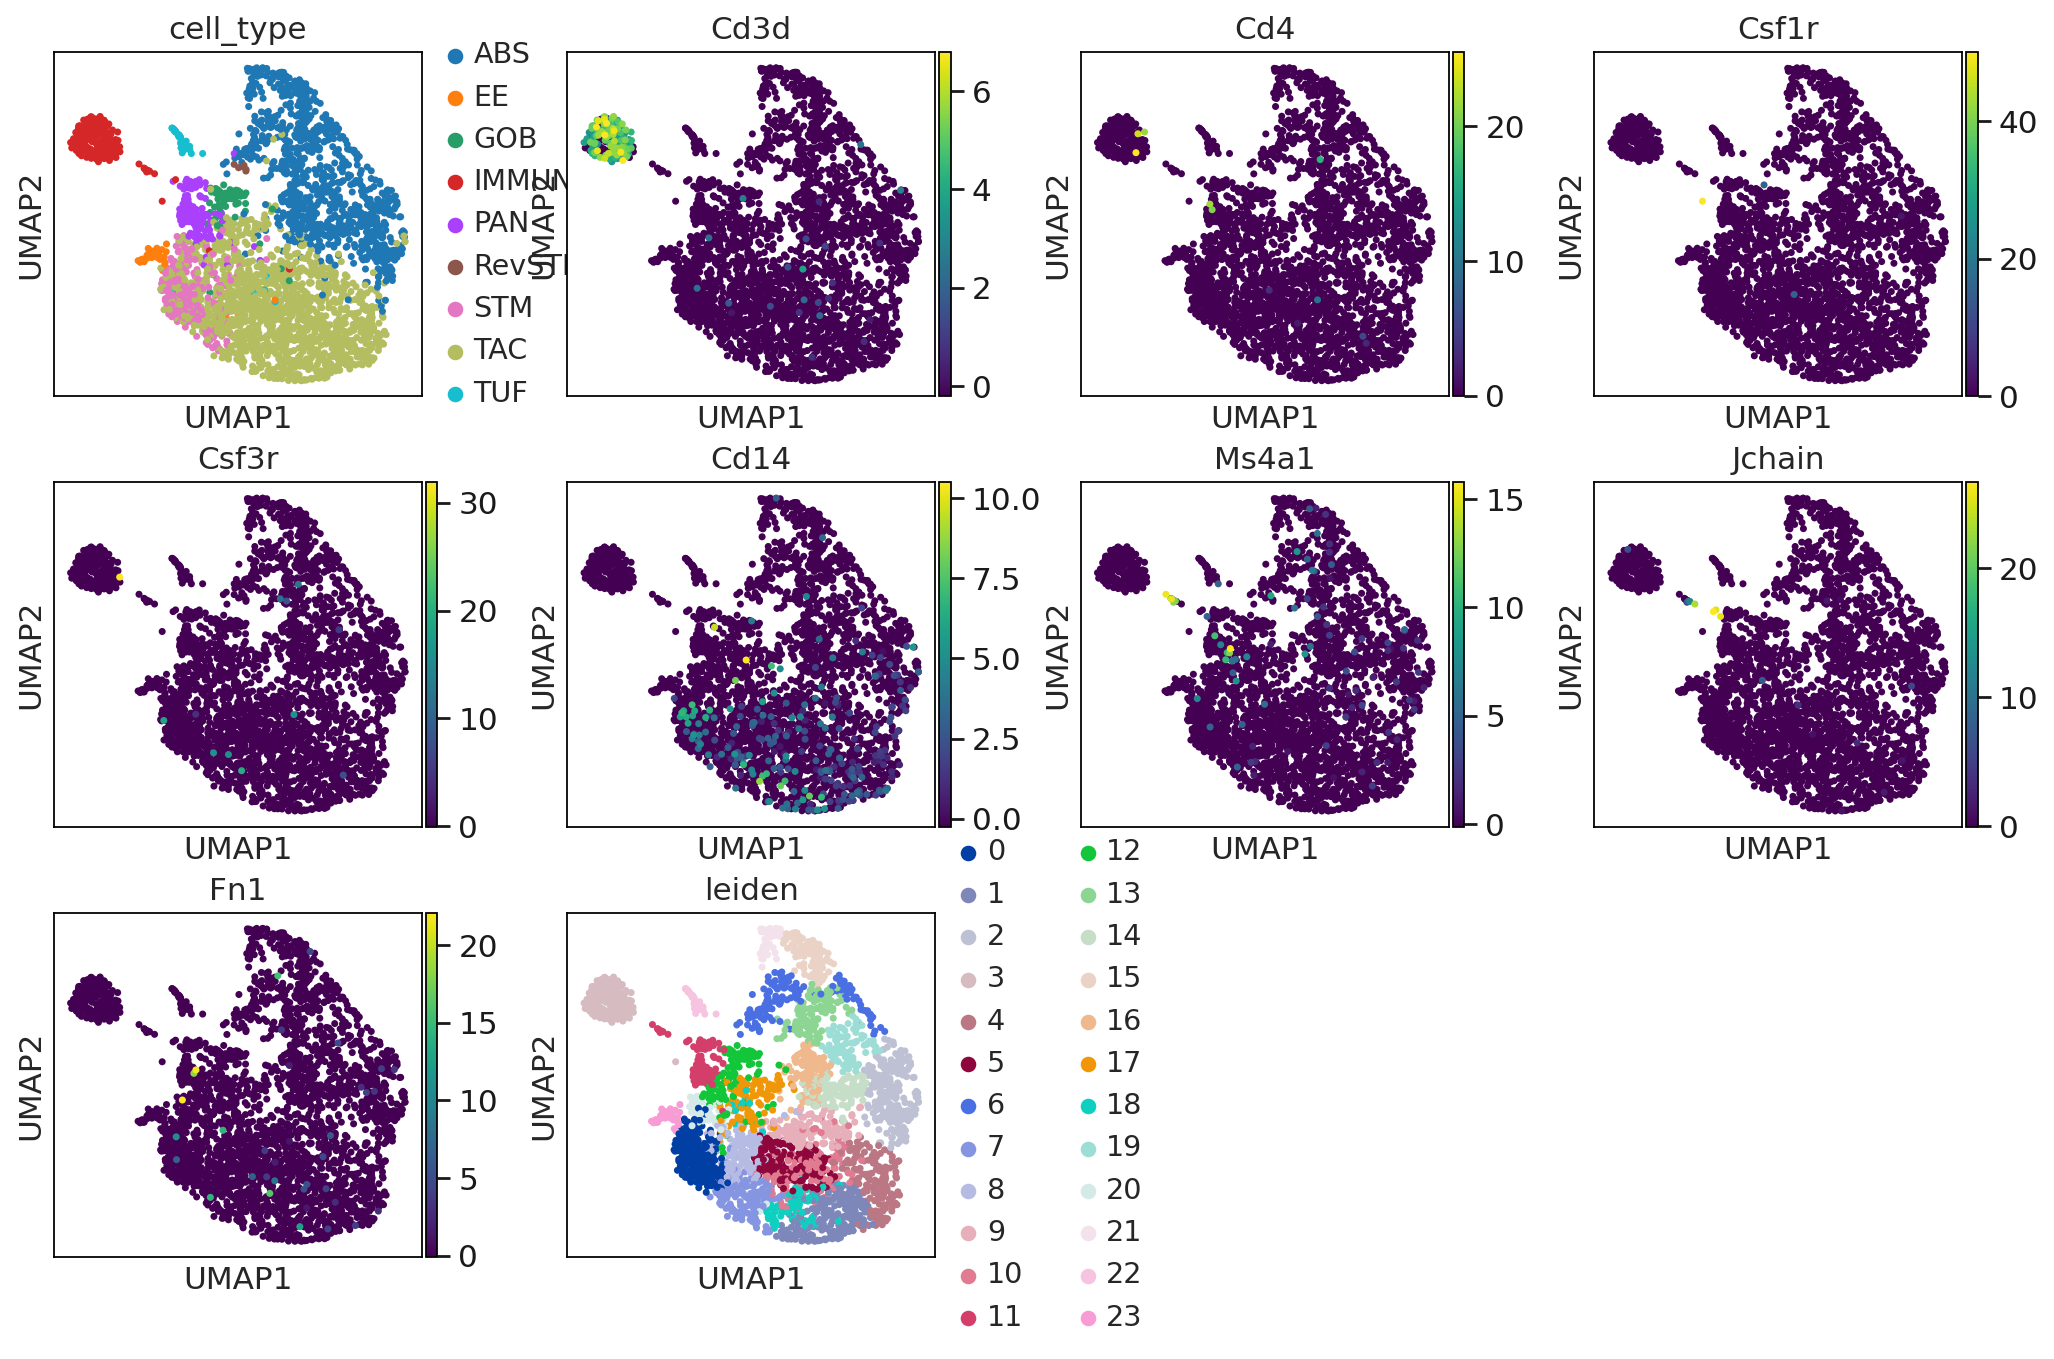

In [150]:
sc.pl.umap( wt, color = ['cell_type', 'Cd3d', 'Cd4', 'Csf1r', 'Csf3r', 'Cd14', 'Ms4a1', 'Jchain',  'Fn1', 'leiden'], use_raw = False)

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


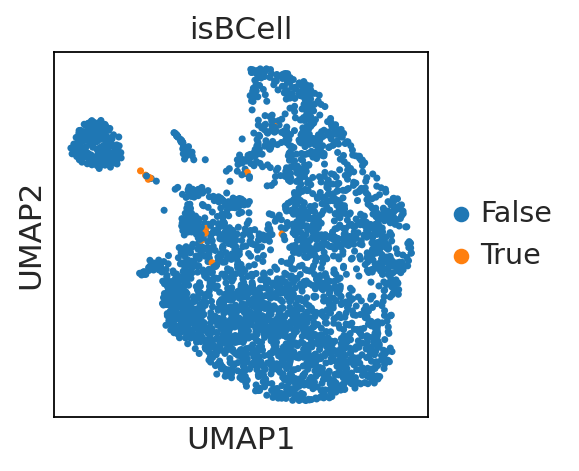

In [152]:
wt.obs['isBCell'] = wt.to_df()['Ms4a1'] > 8
wt.obs['isBCell']  = wt.obs['isBCell'] .astype(str)
sc.pl.umap( wt, color = 'isBCell')

In [165]:
zc.normalization( mut)
zc.clustering( mut)

/home/lucy/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [166]:
sc.tl.tsne( mut,n_pcs=50 , perplexity =25 )

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f0240081820>
Traceback (most recent call last):
  File "/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [142]:
#zc_filter.markers_plots_dict( wt, marker_dict=zc_filter.mouse_non_epi)

In [169]:
sc.tl.umap( mut )

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


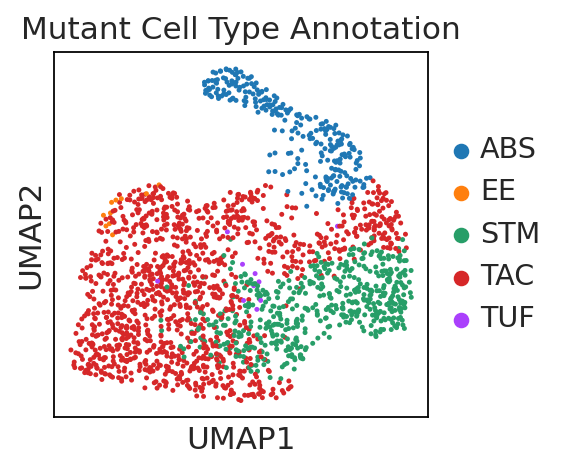

In [176]:
sc.pl.umap( mut, color = ['cell_type', ], use_raw = False, s = 20, title = 'Mutant Cell Type Annotation')

/home/lucy/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


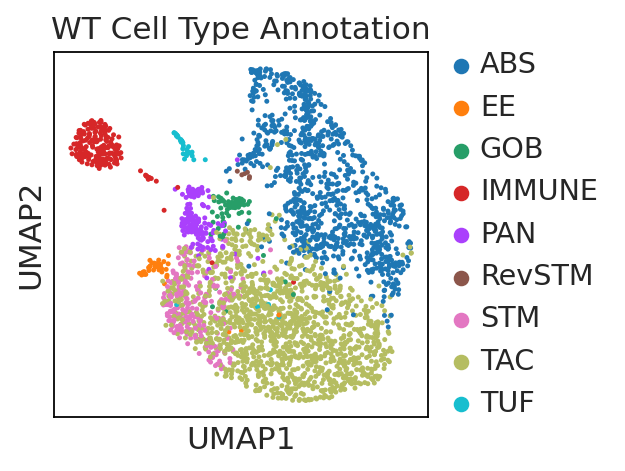

In [177]:
sc.pl.umap( wt, color = ['cell_type', ], use_raw = False, s = 20, title = 'WT Cell Type Annotation')

## save data

In [25]:
combined2.write( "./new_sample_10868_filtered/combined_dat1246.h5ad", compression = 'gzip' )

In [158]:
#comb_sub.X.sum(axis = 1)

In [156]:
comb_sub.write( "./new_sample_10868_filtered/subsample_combined_dat1246.h5ad", compression = 'gzip' )